In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import sys
import localSettings as ls
import math
print(ls.main_path)
import load_data_run123
import plotter_alex
import importlib
importlib.reload(plotter_alex)
import uproot
import matplotlib.pylab as pylab
import numpy as np
import math
from sklearn.model_selection import train_test_split
import pickle
import xgboost as xgb
import nue_booster 
importlib.reload(nue_booster)
import awkward
from matplotlib import gridspec
from collections import defaultdict
from ROOT import TCanvas, TFile, TProfile, TNtuple, TH1F, TH2F
from ROOT import gROOT, gBenchmark, gRandom, gSystem
import csv

/home/alex/NuMI/PELEE/
Welcome to JupyROOT 6.24/02


In [18]:
isRun3 = False

#to use both Run1 and Run3
isCombined = True

noTune = False
MECTune = True

#ending = "Jan19b"
#ending = "Jan19b_noTune"
ending = "Jan19b_MECTune"

In [19]:
if isRun3 == False and isCombined == False:
    nue_nue_vars_tot_df = pd.read_csv("nue_nue_varstot_full_catsel_nopions_true_angleDiff_"+ending+".csv")
    nue_nue_weights_tot_df = pd.read_csv("nue_nue_weightstot_full_catsel_nopions_true_angleDiff_"+ending+".csv")

    nue_nue_vars_tot = defaultdict(list)
    nue_nue_weights_tot = defaultdict(list)


    nue_nue_vars_tot = nue_nue_vars_tot_df.to_dict()
    nue_nue_weights_tot = nue_nue_weights_tot_df.to_dict()
    nue_nue_vars_tot.pop("Unnamed: 0")
    nue_nue_weights_tot.pop("Unnamed: 0")

    poplist = []

    for c in nue_nue_vars_tot.keys():
        if len(nue_nue_weights_tot[c][0]) > 2:
            nue_nue_weights_tot[c][0] = nue_nue_weights_tot[c][0][1:]
            nue_nue_weights_tot[c][0] = nue_nue_weights_tot[c][0][:-1]
            nue_nue_weights_tot[c][0] = list(map(float,nue_nue_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_nue_vars_tot.keys():
        if len(nue_nue_vars_tot[c][0]) > 2:
            nue_nue_vars_tot[c][0] = nue_nue_vars_tot[c][0][1:]
            nue_nue_vars_tot[c][0] = nue_nue_vars_tot[c][0][:-1]
            nue_nue_vars_tot[c][0] = list(map(float,nue_nue_vars_tot[c][0].split(",")))

    for i in poplist:
        nue_nue_vars_tot.pop(i)
        nue_nue_weights_tot.pop(i)

    ###############################################################

    numu_mc_vars_tot_df = pd.read_csv("numu_mc_varstot_full_catsel_nopions_true_angleDiff_"+ending+".csv")
    numu_mc_weights_tot_df = pd.read_csv("numu_mc_weightstot_full_catsel_nopions_true_angleDiff_"+ending+".csv")

    numu_mc_vars_tot = defaultdict(list)
    numu_mc_weights_tot = defaultdict(list)


    numu_mc_vars_tot = numu_mc_vars_tot_df.to_dict()
    numu_mc_weights_tot = numu_mc_weights_tot_df.to_dict()
    numu_mc_vars_tot.pop("Unnamed: 0")
    numu_mc_weights_tot.pop("Unnamed: 0")

    poplist = []

    for c in numu_mc_vars_tot.keys():
        if len(numu_mc_weights_tot[c][0]) > 2:
            numu_mc_weights_tot[c][0] = numu_mc_weights_tot[c][0][1:]
            numu_mc_weights_tot[c][0] = numu_mc_weights_tot[c][0][:-1]
            numu_mc_weights_tot[c][0] = list(map(float,numu_mc_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_mc_vars_tot.keys():
        if len(numu_mc_vars_tot[c][0]) > 2:
            numu_mc_vars_tot[c][0] = numu_mc_vars_tot[c][0][1:]
            numu_mc_vars_tot[c][0] = numu_mc_vars_tot[c][0][:-1]
            numu_mc_vars_tot[c][0] = list(map(float,numu_mc_vars_tot[c][0].split(",")))

    for i in poplist:
        numu_mc_vars_tot.pop(i)
        numu_mc_weights_tot.pop(i)

    ###############################################################
elif isRun3 == True and isCombined == False:
    nue_nue_vars_tot_df = pd.read_csv("nue_nue_varstot_full_catsel_nopions_true_angleDiff_run3_"+ending+".csv")
    nue_nue_weights_tot_df = pd.read_csv("nue_nue_weightstot_full_catsel_nopions_true_angleDiff_run3_"+ending+".csv")

    nue_nue_vars_tot = defaultdict(list)
    nue_nue_weights_tot = defaultdict(list)


    nue_nue_vars_tot = nue_nue_vars_tot_df.to_dict()
    nue_nue_weights_tot = nue_nue_weights_tot_df.to_dict()
    nue_nue_vars_tot.pop("Unnamed: 0")
    nue_nue_weights_tot.pop("Unnamed: 0")

    poplist = []

    for c in nue_nue_vars_tot.keys():
        if len(nue_nue_weights_tot[c][0]) > 2:
            nue_nue_weights_tot[c][0] = nue_nue_weights_tot[c][0][1:]
            nue_nue_weights_tot[c][0] = nue_nue_weights_tot[c][0][:-1]
            nue_nue_weights_tot[c][0] = list(map(float,nue_nue_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_nue_vars_tot.keys():
        if len(nue_nue_vars_tot[c][0]) > 2:
            nue_nue_vars_tot[c][0] = nue_nue_vars_tot[c][0][1:]
            nue_nue_vars_tot[c][0] = nue_nue_vars_tot[c][0][:-1]
            nue_nue_vars_tot[c][0] = list(map(float,nue_nue_vars_tot[c][0].split(",")))

    for i in poplist:
        nue_nue_vars_tot.pop(i)
        nue_nue_weights_tot.pop(i)

    ###############################################################

    numu_mc_vars_tot_df = pd.read_csv("numu_mc_varstot_full_catsel_nopions_true_angleDiff_run3_"+ending+".csv")
    numu_mc_weights_tot_df = pd.read_csv("numu_mc_weightstot_full_catsel_nopions_true_angleDiff_run3_"+ending+".csv")

    numu_mc_vars_tot = defaultdict(list)
    numu_mc_weights_tot = defaultdict(list)


    numu_mc_vars_tot = numu_mc_vars_tot_df.to_dict()
    numu_mc_weights_tot = numu_mc_weights_tot_df.to_dict()
    numu_mc_vars_tot.pop("Unnamed: 0")
    numu_mc_weights_tot.pop("Unnamed: 0")

    poplist = []

    for c in numu_mc_vars_tot.keys():
        if len(numu_mc_weights_tot[c][0]) > 2:
            numu_mc_weights_tot[c][0] = numu_mc_weights_tot[c][0][1:]
            numu_mc_weights_tot[c][0] = numu_mc_weights_tot[c][0][:-1]
            numu_mc_weights_tot[c][0] = list(map(float,numu_mc_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_mc_vars_tot.keys():
        if len(numu_mc_vars_tot[c][0]) > 2:
            numu_mc_vars_tot[c][0] = numu_mc_vars_tot[c][0][1:]
            numu_mc_vars_tot[c][0] = numu_mc_vars_tot[c][0][:-1]
            numu_mc_vars_tot[c][0] = list(map(float,numu_mc_vars_tot[c][0].split(",")))

    for i in poplist:
        numu_mc_vars_tot.pop(i)
        numu_mc_weights_tot.pop(i)

    ###############################################################
elif isCombined == True:
    nue_nue_vars_tot_df_run1 = pd.read_csv("nue_nue_varstot_full_catsel_nopions_true_angleDiff_"+ending+".csv")
    nue_nue_weights_tot_df_run1 = pd.read_csv("nue_nue_weightstot_full_catsel_nopions_true_angleDiff_"+ending+".csv")

    nue_nue_vars_tot_run1 = defaultdict(list)
    nue_nue_weights_tot_run1 = defaultdict(list)


    nue_nue_vars_tot_run1 = nue_nue_vars_tot_df_run1.to_dict()
    nue_nue_weights_tot_run1 = nue_nue_weights_tot_df_run1.to_dict()
    nue_nue_vars_tot_run1.pop("Unnamed: 0")
    nue_nue_weights_tot_run1.pop("Unnamed: 0")

    poplist = []

    for c in nue_nue_vars_tot_run1.keys():
        if len(nue_nue_weights_tot_run1[c][0]) > 2:
            nue_nue_weights_tot_run1[c][0] = nue_nue_weights_tot_run1[c][0][1:]
            nue_nue_weights_tot_run1[c][0] = nue_nue_weights_tot_run1[c][0][:-1]
            nue_nue_weights_tot_run1[c][0] = list(map(float,nue_nue_weights_tot_run1[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_nue_vars_tot_run1.keys():
        if len(nue_nue_vars_tot_run1[c][0]) > 2:
            nue_nue_vars_tot_run1[c][0] = nue_nue_vars_tot_run1[c][0][1:]
            nue_nue_vars_tot_run1[c][0] = nue_nue_vars_tot_run1[c][0][:-1]
            nue_nue_vars_tot_run1[c][0] = list(map(float,nue_nue_vars_tot_run1[c][0].split(",")))

    for i in poplist:
        nue_nue_vars_tot_run1.pop(i)
        nue_nue_weights_tot_run1.pop(i)

    ###############################################################

    numu_mc_vars_tot_df_run1 = pd.read_csv("numu_mc_varstot_full_catsel_nopions_true_angleDiff_"+ending+".csv")
    numu_mc_weights_tot_df_run1 = pd.read_csv("numu_mc_weightstot_full_catsel_nopions_true_angleDiff_"+ending+".csv")

    numu_mc_vars_tot_run1 = defaultdict(list)
    numu_mc_weights_tot_run1= defaultdict(list)


    numu_mc_vars_tot_run1 = numu_mc_vars_tot_df_run1.to_dict()
    numu_mc_weights_tot_run1 = numu_mc_weights_tot_df_run1.to_dict()
    numu_mc_vars_tot_run1.pop("Unnamed: 0")
    numu_mc_weights_tot_run1.pop("Unnamed: 0")

    poplist = []

    for c in numu_mc_vars_tot_run1.keys():
        if len(numu_mc_weights_tot_run1[c][0]) > 2:
            numu_mc_weights_tot_run1[c][0] = numu_mc_weights_tot_run1[c][0][1:]
            numu_mc_weights_tot_run1[c][0] = numu_mc_weights_tot_run1[c][0][:-1]
            numu_mc_weights_tot_run1[c][0] = list(map(float,numu_mc_weights_tot_run1[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_mc_vars_tot_run1.keys():
        if len(numu_mc_vars_tot_run1[c][0]) > 2:
            numu_mc_vars_tot_run1[c][0] = numu_mc_vars_tot_run1[c][0][1:]
            numu_mc_vars_tot_run1[c][0] = numu_mc_vars_tot_run1[c][0][:-1]
            numu_mc_vars_tot_run1[c][0] = list(map(float,numu_mc_vars_tot_run1[c][0].split(",")))

    for i in poplist:
        numu_mc_vars_tot_run1.pop(i)
        numu_mc_weights_tot_run1.pop(i)

    ###############################################################
    nue_nue_vars_tot_df_run3 = pd.read_csv("nue_nue_varstot_full_catsel_nopions_true_angleDiff_run3_"+ending+".csv")
    nue_nue_weights_tot_df_run3 = pd.read_csv("nue_nue_weightstot_full_catsel_nopions_true_angleDiff_run3_"+ending+".csv")

    nue_nue_vars_tot_run3 = defaultdict(list)
    nue_nue_weights_tot_run3 = defaultdict(list)


    nue_nue_vars_tot_run3 = nue_nue_vars_tot_df_run3.to_dict()
    nue_nue_weights_tot_run3 = nue_nue_weights_tot_df_run3.to_dict()
    nue_nue_vars_tot_run3.pop("Unnamed: 0")
    nue_nue_weights_tot_run3.pop("Unnamed: 0")

    poplist = []

    for c in nue_nue_vars_tot_run3.keys():
        if len(nue_nue_weights_tot_run3[c][0]) > 2:
            nue_nue_weights_tot_run3[c][0] = nue_nue_weights_tot_run3[c][0][1:]
            nue_nue_weights_tot_run3[c][0] = nue_nue_weights_tot_run3[c][0][:-1]
            nue_nue_weights_tot_run3[c][0] = list(map(float,nue_nue_weights_tot_run3[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_nue_vars_tot_run3.keys():
        if len(nue_nue_vars_tot_run3[c][0]) > 2:
            nue_nue_vars_tot_run3[c][0] = nue_nue_vars_tot_run3[c][0][1:]
            nue_nue_vars_tot_run3[c][0] = nue_nue_vars_tot_run3[c][0][:-1]
            nue_nue_vars_tot_run3[c][0] = list(map(float,nue_nue_vars_tot_run3[c][0].split(",")))

    for i in poplist:
        nue_nue_vars_tot_run3.pop(i)
        nue_nue_weights_tot_run3.pop(i)

    ###############################################################

    numu_mc_vars_tot_df_run3 = pd.read_csv("numu_mc_varstot_full_catsel_nopions_true_angleDiff_run3_"+ending+".csv")
    numu_mc_weights_tot_df_run3 = pd.read_csv("numu_mc_weightstot_full_catsel_nopions_true_angleDiff_run3_"+ending+".csv")

    numu_mc_vars_tot_run3 = defaultdict(list)
    numu_mc_weights_tot_run3 = defaultdict(list)


    numu_mc_vars_tot_run3 = numu_mc_vars_tot_df_run3.to_dict()
    numu_mc_weights_tot_run3 = numu_mc_weights_tot_df_run3.to_dict()
    numu_mc_vars_tot_run3.pop("Unnamed: 0")
    numu_mc_weights_tot_run3.pop("Unnamed: 0")

    poplist = []

    for c in numu_mc_vars_tot_run3.keys():
        if len(numu_mc_weights_tot_run3[c][0]) > 2:
            numu_mc_weights_tot_run3[c][0] = numu_mc_weights_tot_run3[c][0][1:]
            numu_mc_weights_tot_run3[c][0] = numu_mc_weights_tot_run3[c][0][:-1]
            numu_mc_weights_tot_run3[c][0] = list(map(float,numu_mc_weights_tot_run3[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_mc_vars_tot_run3.keys():
        if len(numu_mc_vars_tot_run3[c][0]) > 2:
            numu_mc_vars_tot_run3[c][0] = numu_mc_vars_tot_run3[c][0][1:]
            numu_mc_vars_tot_run3[c][0] = numu_mc_vars_tot_run3[c][0][:-1]
            numu_mc_vars_tot_run3[c][0] = list(map(float,numu_mc_vars_tot_run3[c][0].split(",")))

    for i in poplist:
        numu_mc_vars_tot_run3.pop(i)
        numu_mc_weights_tot_run3.pop(i)

    ###############################################################

In [20]:
if isRun3 == False and isCombined == False:
    with open('nue_nue_stat_errs_updated_full_catsel_nopions_true_angleDiff_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_stat_errs = list(csv_reader)

    for a in range(len(nue_nue_stat_errs)):
        nue_nue_stat_errs[a] = float(nue_nue_stat_errs[a][0])

    print("nue_nue_stat_errs = ", nue_nue_stat_errs)

    ################################################

    with open('numu_mc_stat_errs_updated_full_catsel_nopions_true_angleDiff_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_stat_errs = list(csv_reader)

    for a in range(len(numu_mc_stat_errs)):
        numu_mc_stat_errs[a] = float(numu_mc_stat_errs[a][0])

    print("numu_mc_stat_errs = ", numu_mc_stat_errs)

    ###################################################
elif isRun3 == True and isCombined == False:
    with open('nue_nue_stat_errs_updated_full_catsel_nopions_true_angleDiff_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_stat_errs = list(csv_reader)

    for a in range(len(nue_nue_stat_errs)):
        nue_nue_stat_errs[a] = float(nue_nue_stat_errs[a][0])

    print("nue_nue_stat_errs = ", nue_nue_stat_errs)


    ################################################

    with open('numu_mc_stat_errs_updated_full_catsel_nopions_true_angleDiff_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_stat_errs = list(csv_reader)

    for a in range(len(numu_mc_stat_errs)):
        numu_mc_stat_errs[a] = float(numu_mc_stat_errs[a][0])

    print("numu_mc_stat_errs = ", numu_mc_stat_errs)


    ###################################################
elif isCombined == True:
    
    #Removed updated for old stat errs
    with open('nue_nue_stat_errs_updated_full_catsel_nopions_true_angleDiff_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_stat_errs_run1 = list(csv_reader)

    for a in range(len(nue_nue_stat_errs_run1)):
        nue_nue_stat_errs_run1[a] = float(nue_nue_stat_errs_run1[a][0])

    print("nue_nue_stat_errs_run1 = ", nue_nue_stat_errs_run1)


    ################################################

    with open('numu_mc_stat_errs_updated_full_catsel_nopions_true_angleDiff_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_stat_errs_run1 = list(csv_reader)

    for a in range(len(numu_mc_stat_errs_run1)):
        numu_mc_stat_errs_run1[a] = float(numu_mc_stat_errs_run1[a][0])

    print("numu_mc_stat_errs_run1 = ", numu_mc_stat_errs_run1)


    ###################################################
    with open('nue_nue_stat_errs_updated_full_catsel_nopions_true_angleDiff_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_stat_errs_run3 = list(csv_reader)

    for a in range(len(nue_nue_stat_errs_run3)):
        nue_nue_stat_errs_run3[a] = float(nue_nue_stat_errs_run3[a][0])

    print("nue_nue_stat_errs_run3 = ", nue_nue_stat_errs_run3)


    ################################################

    with open('numu_mc_stat_errs_updated_full_catsel_nopions_true_angleDiff_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_stat_errs_run3 = list(csv_reader)

    for a in range(len(numu_mc_stat_errs_run3)):
        numu_mc_stat_errs_run3[a] = float(numu_mc_stat_errs_run3[a][0])

    print("numu_mc_stat_errs_run3 = ", numu_mc_stat_errs_run3)


    ###################################################

nue_nue_stat_errs_run1 =  [0.35367573896943694, 0.5457321013958559, 0.5018904832123271, 0.6616303266061494, 0.8263091730905991, 1.0987775116942997, 1.0168453079083504, 1.586958110153144, 3.1929658129946574, 10.292771875857053]
numu_mc_stat_errs_run1 =  [131.7063283081335, 294.2976849416834, 81.00359957720659, 198.78837130340585, 272.83632060300715, 258.1287776240373, 295.4421105364838, 290.90393875095987, 515.6052762925982, 1881.021928730246]
nue_nue_stat_errs_run3 =  [3.6456896180526304, 2.817775458978624, 2.2328388661824166, 2.641377206440524, 2.2691231642539633, 2.4254185098068533, 3.664582421642973, 6.392153964074368, 11.6406349502828, 46.5753114042252]
numu_mc_stat_errs_run3 =  [316.9035467430034, 429.95217970508725, 1638.0912254589591, 967.125237159137, 1093.654108657774, 1516.2973762710617, 1580.515445115662, 2477.701589072086, 3500.123296597492, 13284.787743344437]


In [21]:
def get_cov_matrix(final_ns, final_ncvs, Nuniverse):
  
    for a in range(len(final_ns)):
        for b in range(len(final_ns[0])):
            final_ns[a][b] = float(final_ns[a][b])
            
    for a in range(len(final_ncvs)):
        final_ncvs[a] = float(final_ncvs[a][0])
        
    cov = np.empty([len(final_ns[0]), len(final_ns[0])])
    cov.fill(0)

    for n in final_ns:
        for i in range(len(final_ns[0])):
            for j in range(len(final_ns[0])):
                cov[i][j] += (n[i] - final_ncvs[i]) * (n[j] - final_ncvs[j])
    
    cov /= Nuniverse
    
    return cov


def get_geo_cov_matrix(final_ns, final_ncvs):
    
    for a in range(len(final_ns)):
        for b in range(len(final_ns[0])):
            final_ns[a][b] = float(final_ns[a][b])
            
    for a in range(len(final_ncvs)):
        final_ncvs[a] = float(final_ncvs[a][0])
    
    for x in range(len(final_ns)):
        final_ns[x] = np.array_split(final_ns[x], 2)
    
    variationNumber=0

    
    for n_tot_pair in final_ns:
        tempCov = np.empty([len(final_ns), len(final_ns)])
        tempCov.fill(0)
        for n in n_tot_pair:
            for i in range(len(final_ns)):
                for j in range(len(final_ns)):
                    tempCov[i][j] += (n[i] - final_ncvs[i]) * (n[j] - final_ncvs[j])

        tempCov /= 2

        if variationNumber == 0:
            cov = tempCov
            variationNumber = variationNumber+1
        else:
            cov += tempCov
            variationNumber = variationNumber+1
    
    return cov

In [22]:
if isRun3 == False and isCombined == False:
    #############################
    #### nue_nue ################
    #############################
    with open('nue_nue_syserss_final_ns_ppfx_full_500_catsel_nopions_true_angleDiff_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_ppfx = list(csv_reader)   

    with open('nue_nue_syserss_final_ncvs_ppfx_full_500_catsel_nopions_true_angleDiff_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_ppfx = list(csv_reader)


    with open('nue_nue_syserss_final_ns_genie_full_500_catsel_nopions_true_angleDiff_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_genie = list(csv_reader)

    with open('nue_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_true_angleDiff_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_genie = list(csv_reader)

    """
    with open('nue_nue_syserss_final_ns_reint_full_500_catsel_nopions_true_angleDiff_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('nue_nue_syserss_final_ncvs_reint_full_500_catsel_nopions_true_angleDiff_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('nue_nue_syserss_final_ns_geo_full_catsel_nopions_true_angleDiff_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_geo = list(csv_reader)

    with open('nue_nue_syserss_final_ncvs_geo_full_catsel_nopions_true_angleDiff_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_geo = list(csv_reader)    
    """


    cov_nue_nue_ppfx = get_cov_matrix(nue_nue_final_ns_ppfx, nue_nue_final_ncvs_ppfx, 500)
    cov_nue_nue_genie = get_cov_matrix(nue_nue_final_ns_genie, nue_nue_final_ncvs_genie, 500)
    #cov_nue_nue_reint = get_cov_matrix(nue_nue_final_ns_reint, nue_nue_final_ncvs_reint, 500)
    #cov_nue_nue_geo = get_geo_cov_matrix(nue_nue_final_ns_geo, nue_nue_final_ncvs_geo)

    ###########################################################################################
    """
    #############################
    #### numu_mc ################
    #############################
    with open('numu_mc_syserss_final_ns_ppfx_full_500_catsel_nopions_true_angleDiff_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_ppfx = list(csv_reader)   

    with open('numu_mc_syserss_final_ncvs_ppfx_full_500_catsel_nopions_true_angleDiff_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_ppfx = list(csv_reader)


    with open('numu_mc_syserss_final_ns_genie_full_500_catsel_nopions_true_angleDiff_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_genie = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_true_angleDiff_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_genie = list(csv_reader)

    
    with open('numu_mc_syserss_final_ns_reint_full_500_catsel_nopions_true_angleDiff_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_reint = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_reint_full_500_catsel_nopions_true_angleDiff_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_reint = list(csv_reader)   


    with open('numu_mc_syserss_final_ns_geo_full_catsel_nopions_true_angleDiff_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_geo = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_geo_full_catsel_nopions_true_angleDiff_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_geo = list(csv_reader)    

    """

    #cov_numu_mc_ppfx = get_cov_matrix(numu_mc_final_ns_ppfx, numu_mc_final_ncvs_ppfx, 500)
    #cov_numu_mc_genie = get_cov_matrix(numu_mc_final_ns_genie, numu_mc_final_ncvs_genie, 500)
    #cov_numu_mc_reint = get_cov_matrix(numu_mc_final_ns_reint, numu_mc_final_ncvs_reint, 500)
    #cov_numu_mc_geo = get_geo_cov_matrix(numu_mc_final_ns_geo, numu_mc_final_ncvs_geo)
elif isRun3 == True and isCombined == False:
    #############################
    #### nue_nue ################
    #############################
    with open('nue_nue_syserss_final_ns_ppfx_full_500_catsel_nopions_true_angleDiff_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_ppfx = list(csv_reader)   

    with open('nue_nue_syserss_final_ncvs_ppfx_full_500_catsel_nopions_true_angleDiff_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_ppfx = list(csv_reader)


    with open('nue_nue_syserss_final_ns_genie_full_500_catsel_nopions_true_angleDiff_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_genie = list(csv_reader)

    with open('nue_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_true_angleDiff_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_genie = list(csv_reader)


    with open('nue_nue_syserss_final_ns_reint_full_500_catsel_nopions_true_angleDiff_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('nue_nue_syserss_final_ncvs_reint_full_500_catsel_nopions_true_angleDiff_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('nue_nue_syserss_final_ns_geo_full_catsel_nopions_true_angleDiff_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_geo = list(csv_reader)

    with open('nue_nue_syserss_final_ncvs_geo_full_catsel_nopions_true_angleDiff_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_geo = list(csv_reader)    



    cov_nue_nue_ppfx = get_cov_matrix(nue_nue_final_ns_ppfx, nue_nue_final_ncvs_ppfx, 500)
    cov_nue_nue_genie = get_cov_matrix(nue_nue_final_ns_genie, nue_nue_final_ncvs_genie, 500)
    cov_nue_nue_reint = get_cov_matrix(nue_nue_final_ns_reint, nue_nue_final_ncvs_reint, 500)
    cov_nue_nue_geo = get_geo_cov_matrix(nue_nue_final_ns_geo, nue_nue_final_ncvs_geo)

    ###########################################################################################

    #############################
    #### numu_mc ################
    #############################
    with open('numu_mc_syserss_final_ns_ppfx_full_500_catsel_nopions_true_angleDiff_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_ppfx = list(csv_reader)   

    with open('numu_mc_syserss_final_ncvs_ppfx_full_500_catsel_nopions_true_angleDiff_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_ppfx = list(csv_reader)


    with open('numu_mc_syserss_final_ns_genie_full_500_catsel_nopions_true_angleDiff_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_genie = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_true_angleDiff_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_genie = list(csv_reader)


    with open('numu_mc_syserss_final_ns_reint_full_500_catsel_nopions_true_angleDiff_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_reint = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_reint_full_500_catsel_nopions_true_angleDiff_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_reint = list(csv_reader)   


    with open('numu_mc_syserss_final_ns_geo_full_catsel_nopions_true_angleDiff_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_geo = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_geo_full_catsel_nopions_true_angleDiff_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_geo = list(csv_reader)    



    cov_numu_mc_ppfx = get_cov_matrix(numu_mc_final_ns_ppfx, numu_mc_final_ncvs_ppfx, 500)
    cov_numu_mc_genie = get_cov_matrix(numu_mc_final_ns_genie, numu_mc_final_ncvs_genie, 500)
    cov_numu_mc_reint = get_cov_matrix(numu_mc_final_ns_reint, numu_mc_final_ncvs_reint, 500)
    cov_numu_mc_geo = get_geo_cov_matrix(numu_mc_final_ns_geo, numu_mc_final_ncvs_geo)
elif isCombined == True:
    #############################
    #### nue_nue ################
    #############################
    with open('nue_nue_syserss_final_ns_ppfx_full_500_catsel_nopions_true_angleDiff_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_ppfx_run1 = list(csv_reader)   

    with open('nue_nue_syserss_final_ncvs_ppfx_full_500_catsel_nopions_true_angleDiff_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_ppfx_run1 = list(csv_reader)


    with open('nue_nue_syserss_final_ns_genie_full_500_catsel_nopions_true_angleDiff_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_genie_run1 = list(csv_reader)

    with open('nue_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_true_angleDiff_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_genie_run1 = list(csv_reader)


    with open('nue_nue_syserss_final_ns_reint_full_500_catsel_nopions_true_angleDiff_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_reint_run1 = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('nue_nue_syserss_final_ncvs_reint_full_500_catsel_nopions_true_angleDiff_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_reint_run1 = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('nue_nue_syserss_final_ns_geo_full_catsel_nopions_true_angleDiff_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_geo_run1 = list(csv_reader)

    with open('nue_nue_syserss_final_ncvs_geo_full_catsel_nopions_true_angleDiff_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_geo_run1 = list(csv_reader)    



    cov_nue_nue_ppfx_run1 = get_cov_matrix(nue_nue_final_ns_ppfx_run1, nue_nue_final_ncvs_ppfx_run1, 500)
    cov_nue_nue_genie_run1 = get_cov_matrix(nue_nue_final_ns_genie_run1, nue_nue_final_ncvs_genie_run1, 500)
    cov_nue_nue_reint_run1 = get_cov_matrix(nue_nue_final_ns_reint_run1, nue_nue_final_ncvs_reint_run1, 500)
    cov_nue_nue_geo_run1 = get_geo_cov_matrix(nue_nue_final_ns_geo_run1, nue_nue_final_ncvs_geo_run1)

    ###########################################################################################

    #############################
    #### numu_mc ################
    #############################
    with open('numu_mc_syserss_final_ns_ppfx_full_500_catsel_nopions_true_angleDiff_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_ppfx_run1 = list(csv_reader)   

    with open('numu_mc_syserss_final_ncvs_ppfx_full_500_catsel_nopions_true_angleDiff_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_ppfx_run1 = list(csv_reader)


    with open('numu_mc_syserss_final_ns_genie_full_500_catsel_nopions_true_angleDiff_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_genie_run1 = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_true_angleDiff_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_genie_run1 = list(csv_reader)


    with open('numu_mc_syserss_final_ns_reint_full_500_catsel_nopions_true_angleDiff_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_reint_run1 = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_reint_full_500_catsel_nopions_true_angleDiff_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_reint_run1 = list(csv_reader)   


    with open('numu_mc_syserss_final_ns_geo_full_catsel_nopions_true_angleDiff_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_geo_run1 = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_geo_full_catsel_nopions_true_angleDiff_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_geo_run1 = list(csv_reader)    



    cov_numu_mc_ppfx_run1 = get_cov_matrix(numu_mc_final_ns_ppfx_run1, numu_mc_final_ncvs_ppfx_run1, 500)
    cov_numu_mc_genie_run1 = get_cov_matrix(numu_mc_final_ns_genie_run1, numu_mc_final_ncvs_genie_run1, 500)
    cov_numu_mc_reint_run1 = get_cov_matrix(numu_mc_final_ns_reint_run1, numu_mc_final_ncvs_reint_run1, 500)
    cov_numu_mc_geo_run1 = get_geo_cov_matrix(numu_mc_final_ns_geo_run1, numu_mc_final_ncvs_geo_run1)
    #############################
    #### nue_nue ################
    #############################
    with open('nue_nue_syserss_final_ns_ppfx_full_500_catsel_nopions_true_angleDiff_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_ppfx_run3 = list(csv_reader)   

    with open('nue_nue_syserss_final_ncvs_ppfx_full_500_catsel_nopions_true_angleDiff_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_ppfx_run3 = list(csv_reader)


    with open('nue_nue_syserss_final_ns_genie_full_500_catsel_nopions_true_angleDiff_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_genie_run3 = list(csv_reader)

    with open('nue_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_true_angleDiff_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_genie_run3 = list(csv_reader)


    with open('nue_nue_syserss_final_ns_reint_full_500_catsel_nopions_true_angleDiff_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_reint_run3 = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('nue_nue_syserss_final_ncvs_reint_full_500_catsel_nopions_true_angleDiff_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_reint_run3 = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('nue_nue_syserss_final_ns_geo_full_catsel_nopions_true_angleDiff_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_geo_run3 = list(csv_reader)

    with open('nue_nue_syserss_final_ncvs_geo_full_catsel_nopions_true_angleDiff_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_geo_run3 = list(csv_reader)    



    cov_nue_nue_ppfx_run3 = get_cov_matrix(nue_nue_final_ns_ppfx_run3, nue_nue_final_ncvs_ppfx_run3, 500)
    cov_nue_nue_genie_run3 = get_cov_matrix(nue_nue_final_ns_genie_run3, nue_nue_final_ncvs_genie_run3, 500)
    cov_nue_nue_reint_run3 = get_cov_matrix(nue_nue_final_ns_reint_run3, nue_nue_final_ncvs_reint_run3, 500)
    cov_nue_nue_geo_run3 = get_geo_cov_matrix(nue_nue_final_ns_geo_run3, nue_nue_final_ncvs_geo_run3)

    ###########################################################################################

    #############################
    #### numu_mc ################
    #############################
    with open('numu_mc_syserss_final_ns_ppfx_full_500_catsel_nopions_true_angleDiff_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_ppfx_run3 = list(csv_reader)   

    with open('numu_mc_syserss_final_ncvs_ppfx_full_500_catsel_nopions_true_angleDiff_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_ppfx_run3 = list(csv_reader)


    with open('numu_mc_syserss_final_ns_genie_full_500_catsel_nopions_true_angleDiff_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_genie_run3 = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_true_angleDiff_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_genie_run3 = list(csv_reader)


    with open('numu_mc_syserss_final_ns_reint_full_500_catsel_nopions_true_angleDiff_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_reint_run3 = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_reint_full_500_catsel_nopions_true_angleDiff_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_reint_run3 = list(csv_reader)   


    with open('numu_mc_syserss_final_ns_geo_full_catsel_nopions_true_angleDiff_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_geo_run3 = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_geo_full_catsel_nopions_true_angleDiff_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_geo_run3 = list(csv_reader)    



    cov_numu_mc_ppfx_run3 = get_cov_matrix(numu_mc_final_ns_ppfx_run3, numu_mc_final_ncvs_ppfx_run3, 500)
    cov_numu_mc_genie_run3 = get_cov_matrix(numu_mc_final_ns_genie_run3, numu_mc_final_ncvs_genie_run3, 500)
    cov_numu_mc_reint_run3 = get_cov_matrix(numu_mc_final_ns_reint_run3, numu_mc_final_ncvs_reint_run3, 500)
    cov_numu_mc_geo_run3 = get_geo_cov_matrix(numu_mc_final_ns_geo_run3, numu_mc_final_ncvs_geo_run3)
    print(cov_numu_mc_geo_run3)

FileNotFoundError: [Errno 2] No such file or directory: 'nue_nue_syserss_final_ns_ppfx_full_500_catsel_nopions_true_angleDiff_Jan19b_MECTune.csv'

In [23]:
######genie only##########

if isCombined == True:
    #############################
    #### nue_nue ################
    #############################

    with open('nue_nue_syserss_final_ns_genie_full_500_catsel_nopions_true_angleDiff_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_genie_run1 = list(csv_reader)

    with open('nue_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_true_angleDiff_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_genie_run1 = list(csv_reader)



    cov_nue_nue_genie_run1 = get_cov_matrix(nue_nue_final_ns_genie_run1, nue_nue_final_ncvs_genie_run1, 500)

    ###########################################################################################

    #############################
    #### numu_mc ################
    #############################


    with open('numu_mc_syserss_final_ns_genie_full_500_catsel_nopions_true_angleDiff_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_genie_run1 = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_true_angleDiff_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_genie_run1 = list(csv_reader)



    cov_numu_mc_genie_run1 = get_cov_matrix(numu_mc_final_ns_genie_run1, numu_mc_final_ncvs_genie_run1, 500)
    
    #############################
    #### nue_nue ################
    #############################


    with open('nue_nue_syserss_final_ns_genie_full_500_catsel_nopions_true_angleDiff_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_genie_run3 = list(csv_reader)

    with open('nue_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_true_angleDiff_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_genie_run3 = list(csv_reader)




    cov_nue_nue_genie_run3 = get_cov_matrix(nue_nue_final_ns_genie_run3, nue_nue_final_ncvs_genie_run3, 500)
    
    ###########################################################################################

    #############################
    #### numu_mc ################
    #############################


    with open('numu_mc_syserss_final_ns_genie_full_500_catsel_nopions_true_angleDiff_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_genie_run3 = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_true_angleDiff_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_genie_run3 = list(csv_reader)


    

    cov_numu_mc_genie_run3 = get_cov_matrix(numu_mc_final_ns_genie_run3, numu_mc_final_ncvs_genie_run3, 500)
    

In [24]:
nue_cov_genie_only = (cov_nue_nue_genie_run1 + cov_nue_nue_genie_run3)

numu_cov_genie_only = (cov_numu_mc_genie_run1 + cov_numu_mc_genie_run3)

In [25]:
if isRun3 == False and isCombined == False:
    ############
    ### ppfx ###
    ############

    #################################################

    nue_nue_df_ppfx = pd.read_csv("nue_nue_syserss_df_ppfx_full_500_catsel_nopions_true_angleDiff_"+ending+".csv")

    nue_nue_df_ppfx = nue_nue_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    nue_nue_df_ppfx_vars = pd.read_csv("nue_nue_syserss_df_ppfx_vars_full_500_catsel_nopions_true_angleDiff_"+ending+".csv")

    nue_nue_df_ppfx_vars = nue_nue_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    nue_nue_df_ppfx_splines = pd.read_csv("nue_nue_syserss_df_ppfx_splines_full_500_catsel_nopions_true_angleDiff_"+ending+".csv")

    nue_nue_df_ppfx_splines = nue_nue_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################
    
    numu_mc_df_ppfx = pd.read_csv("numu_mc_syserss_df_ppfx_full_500_catsel_nopions_true_angleDiff_"+ending+".csv")

    numu_mc_df_ppfx = numu_mc_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_ppfx_vars = pd.read_csv("numu_mc_syserss_df_ppfx_vars_full_500_catsel_nopions_true_angleDiff_"+ending+".csv")

    numu_mc_df_ppfx_vars = numu_mc_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_ppfx_splines = pd.read_csv("numu_mc_syserss_df_ppfx_splines_full_500_catsel_nopions_true_angleDiff_"+ending+".csv")

    numu_mc_df_ppfx_splines = numu_mc_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)
    

    ############
    ### genie ###
    ############

    #################################################

    nue_nue_df_genie = pd.read_csv("nue_nue_syserss_df_genie_full_500_catsel_nopions_true_angleDiff_"+ending+".csv")

    nue_nue_df_genie = nue_nue_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_genie_vars = pd.read_csv("nue_nue_syserss_df_genie_vars_full_500_catsel_nopions_true_angleDiff_"+ending+".csv")

    nue_nue_df_genie_vars = nue_nue_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_genie_splines = pd.read_csv("nue_nue_syserss_df_genie_splines_full_500_catsel_nopions_true_angleDiff_"+ending+".csv")

    nue_nue_df_genie_splines = nue_nue_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################
    
    numu_mc_df_genie = pd.read_csv("numu_mc_syserss_df_genie_full_500_catsel_nopions_true_angleDiff_"+ending+".csv")

    numu_mc_df_genie = numu_mc_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_genie_vars = pd.read_csv("numu_mc_syserss_df_genie_vars_full_500_catsel_nopions_true_angleDiff_"+ending+".csv")

    numu_mc_df_genie_vars = numu_mc_df_genie_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_genie_splines = pd.read_csv("numu_mc_syserss_df_genie_splines_full_500_catsel_nopions_true_angleDiff_"+ending+".csv")

    numu_mc_df_genie_splines = numu_mc_df_genie_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)
    

    ############
    ### reint ###
    ############

    #################################################

    nue_nue_df_reint = pd.read_csv("nue_nue_syserss_df_reint_full_500_catsel_nopions_true_angleDiff_"+ending+".csv")

    nue_nue_df_reint = nue_nue_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_reint_vars = pd.read_csv("nue_nue_syserss_df_reint_vars_full_500_catsel_nopions_true_angleDiff_"+ending+".csv")

    nue_nue_df_reint_vars = nue_nue_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_reint_splines = pd.read_csv("nue_nue_syserss_df_reint_splines_full_500_catsel_nopions_true_angleDiff_"+ending+".csv")

    nue_nue_df_reint_splines = nue_nue_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################
    
    numu_mc_df_reint = pd.read_csv("numu_mc_syserss_df_reint_full_500_catsel_nopions_true_angleDiff_"+ending+".csv")

    numu_mc_df_reint = numu_mc_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_reint_vars = pd.read_csv("numu_mc_syserss_df_reint_vars_full_500_catsel_nopions_true_angleDiff_"+ending+".csv")

    numu_mc_df_reint_vars = numu_mc_df_reint_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_reint_splines = pd.read_csv("numu_mc_syserss_df_reint_splines_full_500_catsel_nopions_true_angleDiff_"+ending+".csv")

    numu_mc_df_reint_splines = numu_mc_df_reint_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)
    

    ############
    ### geo ###
    ############

    #################################################

    nue_nue_df_geo = pd.read_csv("nue_nue_syserss_df_geo_full_catsel_nopions_true_angleDiff_"+ending+".csv")

    nue_nue_df_geo = nue_nue_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_geo_vars = pd.read_csv("nue_nue_syserss_df_geo_vars_full_catsel_nopions_true_angleDiff_"+ending+".csv")

    nue_nue_df_geo_vars = nue_nue_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_geo_splines = pd.read_csv("nue_nue_syserss_df_geo_splines_full_catsel_nopions_true_angleDiff_"+ending+".csv")

    nue_nue_df_geo_splines = nue_nue_df_geo_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################
    
    numu_mc_df_geo = pd.read_csv("numu_mc_syserss_df_geo_full_catsel_nopions_true_angleDiff_"+ending+".csv")

    numu_mc_df_geo = numu_mc_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_geo_vars = pd.read_csv("numu_mc_syserss_df_geo_vars_full_catsel_nopions_true_angleDiff_"+ending+".csv")

    numu_mc_df_geo_vars = numu_mc_df_geo_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_geo_splines = pd.read_csv("numu_mc_syserss_df_geo_splines_full_catsel_nopions_true_angleDiff_"+ending+".csv")

    numu_mc_df_geo_splines = numu_mc_df_geo_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)
    
elif isRun3 == True and isCombined == False:
    ############
    ### ppfx ###
    ############

    #################################################

    nue_nue_df_ppfx = pd.read_csv("nue_nue_syserss_df_ppfx_full_500_catsel_nopions_true_angleDiff_run3_"+ending+".csv")

    nue_nue_df_ppfx = nue_nue_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    nue_nue_df_ppfx_vars = pd.read_csv("nue_nue_syserss_df_ppfx_vars_full_500_catsel_nopions_true_angleDiff_run3_"+ending+".csv")

    nue_nue_df_ppfx_vars = nue_nue_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    nue_nue_df_ppfx_splines = pd.read_csv("nue_nue_syserss_df_ppfx_splines_full_500_catsel_nopions_true_angleDiff_run3_"+ending+".csv")

    nue_nue_df_ppfx_splines = nue_nue_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################

    numu_mc_df_ppfx = pd.read_csv("numu_mc_syserss_df_ppfx_full_500_catsel_nopions_true_angleDiff_run3_"+ending+".csv")

    numu_mc_df_ppfx = numu_mc_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_ppfx_vars = pd.read_csv("numu_mc_syserss_df_ppfx_vars_full_500_catsel_nopions_true_angleDiff_run3_"+ending+".csv")

    numu_mc_df_ppfx_vars = numu_mc_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_ppfx_splines = pd.read_csv("numu_mc_syserss_df_ppfx_splines_full_500_catsel_nopions_true_angleDiff_run3_"+ending+".csv")

    numu_mc_df_ppfx_splines = numu_mc_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)


    ############
    ### genie ###
    ############

    #################################################

    nue_nue_df_genie = pd.read_csv("nue_nue_syserss_df_genie_full_500_catsel_nopions_true_angleDiff_run3_"+ending+".csv")

    nue_nue_df_genie = nue_nue_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_genie_vars = pd.read_csv("nue_nue_syserss_df_genie_vars_full_500_catsel_nopions_true_angleDiff_run3_"+ending+".csv")

    nue_nue_df_genie_vars = nue_nue_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_genie_splines = pd.read_csv("nue_nue_syserss_df_genie_splines_full_500_catsel_nopions_true_angleDiff_run3_"+ending+".csv")

    nue_nue_df_genie_splines = nue_nue_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_mc_df_genie = pd.read_csv("numu_mc_syserss_df_genie_full_500_catsel_nopions_true_angleDiff_run3_"+ending+".csv")

    numu_mc_df_genie = numu_mc_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_genie_vars = pd.read_csv("numu_mc_syserss_df_genie_vars_full_500_catsel_nopions_true_angleDiff_run3_"+ending+".csv")

    numu_mc_df_genie_vars = numu_mc_df_genie_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_genie_splines = pd.read_csv("numu_mc_syserss_df_genie_splines_full_500_catsel_nopions_true_angleDiff_run3_"+ending+".csv")

    numu_mc_df_genie_splines = numu_mc_df_genie_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)


    ############
    ### reint ###
    ############

    #################################################

    nue_nue_df_reint = pd.read_csv("nue_nue_syserss_df_reint_full_500_catsel_nopions_true_angleDiff_run3_"+ending+".csv")

    nue_nue_df_reint = nue_nue_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_reint_vars = pd.read_csv("nue_nue_syserss_df_reint_vars_full_500_catsel_nopions_true_angleDiff_run3_"+ending+".csv")

    nue_nue_df_reint_vars = nue_nue_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_reint_splines = pd.read_csv("nue_nue_syserss_df_reint_splines_full_500_catsel_nopions_true_angleDiff_run3_"+ending+".csv")

    nue_nue_df_reint_splines = nue_nue_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_mc_df_reint = pd.read_csv("numu_mc_syserss_df_reint_full_500_catsel_nopions_true_angleDiff_run3_"+ending+".csv")

    numu_mc_df_reint = numu_mc_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_reint_vars = pd.read_csv("numu_mc_syserss_df_reint_vars_full_500_catsel_nopions_true_angleDiff_run3_"+ending+".csv")

    numu_mc_df_reint_vars = numu_mc_df_reint_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_reint_splines = pd.read_csv("numu_mc_syserss_df_reint_splines_full_500_catsel_nopions_true_angleDiff_run3_"+ending+".csv")

    numu_mc_df_reint_splines = numu_mc_df_reint_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)


    ############
    ### geo ###
    ############

    #################################################

    nue_nue_df_geo = pd.read_csv("nue_nue_syserss_df_geo_full_catsel_nopions_true_angleDiff_run3_"+ending+".csv")

    nue_nue_df_geo = nue_nue_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_geo_vars = pd.read_csv("nue_nue_syserss_df_geo_vars_full_catsel_nopions_true_angleDiff_run3_"+ending+".csv")

    nue_nue_df_geo_vars = nue_nue_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_geo_splines = pd.read_csv("nue_nue_syserss_df_geo_splines_full_catsel_nopions_true_angleDiff_run3_"+ending+".csv")

    nue_nue_df_geo_splines = nue_nue_df_geo_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_mc_df_geo = pd.read_csv("numu_mc_syserss_df_geo_full_catsel_nopions_true_angleDiff_run3_"+ending+".csv")

    numu_mc_df_geo = numu_mc_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_geo_vars = pd.read_csv("numu_mc_syserss_df_geo_vars_full_catsel_nopions_true_angleDiff_run3_"+ending+".csv")

    numu_mc_df_geo_vars = numu_mc_df_geo_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_geo_splines = pd.read_csv("numu_mc_syserss_df_geo_splines_full_catsel_nopions_true_angleDiff_run3_"+ending+".csv")

    numu_mc_df_geo_splines = numu_mc_df_geo_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)
elif isCombined == True:
    ############
    ### ppfx ###
    ############

    #################################################

    nue_nue_df_ppfx_run1 = pd.read_csv("nue_nue_syserss_df_ppfx_full_500_catsel_nopions_true_angleDiff_"+ending+".csv")

    nue_nue_df_ppfx_run1 = nue_nue_df_ppfx_run1.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    nue_nue_df_ppfx_vars_run1 = pd.read_csv("nue_nue_syserss_df_ppfx_vars_full_500_catsel_nopions_true_angleDiff_"+ending+".csv")

    nue_nue_df_ppfx_vars_run1 = nue_nue_df_ppfx_vars_run1.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    nue_nue_df_ppfx_splines_run1 = pd.read_csv("nue_nue_syserss_df_ppfx_splines_full_500_catsel_nopions_true_angleDiff_"+ending+".csv")

    nue_nue_df_ppfx_splines_run1 = nue_nue_df_ppfx_splines_run1.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################

    numu_mc_df_ppfx_run1 = pd.read_csv("numu_mc_syserss_df_ppfx_full_500_catsel_nopions_true_angleDiff_"+ending+".csv")

    numu_mc_df_ppfx_run1 = numu_mc_df_ppfx_run1.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_ppfx_vars_run1 = pd.read_csv("numu_mc_syserss_df_ppfx_vars_full_500_catsel_nopions_true_angleDiff_"+ending+".csv")

    numu_mc_df_ppfx_vars_run1 = numu_mc_df_ppfx_vars_run1.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_ppfx_splines_run1 = pd.read_csv("numu_mc_syserss_df_ppfx_splines_full_500_catsel_nopions_true_angleDiff_"+ending+".csv")

    numu_mc_df_ppfx_splines_run1 = numu_mc_df_ppfx_splines_run1.set_index('entry')
    #print(nue_nue_df_ppfx_splines)


    ############
    ### genie ###
    ############

    #################################################

    nue_nue_df_genie_run1 = pd.read_csv("nue_nue_syserss_df_genie_full_500_catsel_nopions_true_angleDiff_"+ending+".csv")

    nue_nue_df_genie_run1 = nue_nue_df_genie_run1.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_genie_vars_run1 = pd.read_csv("nue_nue_syserss_df_genie_vars_full_500_catsel_nopions_true_angleDiff_"+ending+".csv")

    nue_nue_df_genie_vars_run1 = nue_nue_df_genie_vars_run1.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_genie_splines_run1 = pd.read_csv("nue_nue_syserss_df_genie_splines_full_500_catsel_nopions_true_angleDiff_"+ending+".csv")

    nue_nue_df_genie_splines_run1 = nue_nue_df_genie_splines_run1.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_mc_df_genie_run1 = pd.read_csv("numu_mc_syserss_df_genie_full_500_catsel_nopions_true_angleDiff_"+ending+".csv")

    numu_mc_df_genie_run1 = numu_mc_df_genie_run1.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_genie_vars_run1 = pd.read_csv("numu_mc_syserss_df_genie_vars_full_500_catsel_nopions_true_angleDiff_"+ending+".csv")

    numu_mc_df_genie_vars_run1 = numu_mc_df_genie_vars_run1.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_genie_splines_run1 = pd.read_csv("numu_mc_syserss_df_genie_splines_full_500_catsel_nopions_true_angleDiff_"+ending+".csv")

    numu_mc_df_genie_splines_run1 = numu_mc_df_genie_splines_run1.set_index('entry')
    #print(nue_nue_df_ppfx_splines)


    ############
    ### reint ###
    ############

    #################################################

    nue_nue_df_reint_run1 = pd.read_csv("nue_nue_syserss_df_reint_full_500_catsel_nopions_true_angleDiff_"+ending+".csv")

    nue_nue_df_reint_run1 = nue_nue_df_reint_run1.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_reint_vars_run1 = pd.read_csv("nue_nue_syserss_df_reint_vars_full_500_catsel_nopions_true_angleDiff_"+ending+".csv")

    nue_nue_df_reint_vars_run1 = nue_nue_df_reint_vars_run1.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_reint_splines_run1 = pd.read_csv("nue_nue_syserss_df_reint_splines_full_500_catsel_nopions_true_angleDiff_"+ending+".csv")

    nue_nue_df_reint_splines_run1 = nue_nue_df_reint_splines_run1.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_mc_df_reint_run1 = pd.read_csv("numu_mc_syserss_df_reint_full_500_catsel_nopions_true_angleDiff_"+ending+".csv")

    numu_mc_df_reint_run1 = numu_mc_df_reint_run1.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_reint_vars_run1 = pd.read_csv("numu_mc_syserss_df_reint_vars_full_500_catsel_nopions_true_angleDiff_"+ending+".csv")

    numu_mc_df_reint_vars_run1 = numu_mc_df_reint_vars_run1.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_reint_splines_run1 = pd.read_csv("numu_mc_syserss_df_reint_splines_full_500_catsel_nopions_true_angleDiff_"+ending+".csv")

    numu_mc_df_reint_splines_run1 = numu_mc_df_reint_splines_run1.set_index('entry')
    #print(nue_nue_df_ppfx_splines)


    ############
    ### geo ###
    ############

    #################################################

    nue_nue_df_geo_run1 = pd.read_csv("nue_nue_syserss_df_geo_full_catsel_nopions_true_angleDiff_"+ending+".csv")

    nue_nue_df_geo_run1 = nue_nue_df_geo_run1.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_geo_vars_run1 = pd.read_csv("nue_nue_syserss_df_geo_vars_full_catsel_nopions_true_angleDiff_"+ending+".csv")

    nue_nue_df_geo_vars_run1 = nue_nue_df_geo_vars_run1.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_geo_splines_run1 = pd.read_csv("nue_nue_syserss_df_geo_splines_full_catsel_nopions_true_angleDiff_"+ending+".csv")

    nue_nue_df_geo_splines_run1 = nue_nue_df_geo_splines_run1.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_mc_df_geo_run1 = pd.read_csv("numu_mc_syserss_df_geo_full_catsel_nopions_true_angleDiff_"+ending+".csv")

    numu_mc_df_geo_run1 = numu_mc_df_geo_run1.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_geo_vars_run1 = pd.read_csv("numu_mc_syserss_df_geo_vars_full_catsel_nopions_true_angleDiff_"+ending+".csv")

    numu_mc_df_geo_vars_run1 = numu_mc_df_geo_vars_run1.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_geo_splines_run1 = pd.read_csv("numu_mc_syserss_df_geo_splines_full_catsel_nopions_true_angleDiff_"+ending+".csv")

    numu_mc_df_geo_splines_run1 = numu_mc_df_geo_splines_run1.set_index('entry')
    #print(nue_nue_df_ppfx_splines)
    
    ############
    ### ppfx ###
    ############

    #################################################

    nue_nue_df_ppfx_run3 = pd.read_csv("nue_nue_syserss_df_ppfx_full_500_catsel_nopions_true_angleDiff_run3_"+ending+".csv")

    nue_nue_df_ppfx_run3 = nue_nue_df_ppfx_run3.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    nue_nue_df_ppfx_vars_run3 = pd.read_csv("nue_nue_syserss_df_ppfx_vars_full_500_catsel_nopions_true_angleDiff_run3_"+ending+".csv")

    nue_nue_df_ppfx_vars_run3 = nue_nue_df_ppfx_vars_run3.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    nue_nue_df_ppfx_splines_run3 = pd.read_csv("nue_nue_syserss_df_ppfx_splines_full_500_catsel_nopions_true_angleDiff_run3_"+ending+".csv")

    nue_nue_df_ppfx_splines_run3 = nue_nue_df_ppfx_splines_run3.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################

    numu_mc_df_ppfx_run3 = pd.read_csv("numu_mc_syserss_df_ppfx_full_500_catsel_nopions_true_angleDiff_run3_"+ending+".csv")

    numu_mc_df_ppfx_run3 = numu_mc_df_ppfx_run3.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_ppfx_vars_run3 = pd.read_csv("numu_mc_syserss_df_ppfx_vars_full_500_catsel_nopions_true_angleDiff_run3_"+ending+".csv")

    numu_mc_df_ppfx_vars_run3 = numu_mc_df_ppfx_vars_run3.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_ppfx_splines_run3 = pd.read_csv("numu_mc_syserss_df_ppfx_splines_full_500_catsel_nopions_true_angleDiff_run3_"+ending+".csv")

    numu_mc_df_ppfx_splines_run3 = numu_mc_df_ppfx_splines_run3.set_index('entry')
    #print(nue_nue_df_ppfx_splines)


    ############
    ### genie ###
    ############

    #################################################

    nue_nue_df_genie_run3 = pd.read_csv("nue_nue_syserss_df_genie_full_500_catsel_nopions_true_angleDiff_run3_"+ending+".csv")

    nue_nue_df_genie_run3 = nue_nue_df_genie_run3.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_genie_vars_run3 = pd.read_csv("nue_nue_syserss_df_genie_vars_full_500_catsel_nopions_true_angleDiff_run3_"+ending+".csv")

    nue_nue_df_genie_vars_run3 = nue_nue_df_genie_vars_run3.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_genie_splines_run3 = pd.read_csv("nue_nue_syserss_df_genie_splines_full_500_catsel_nopions_true_angleDiff_run3_"+ending+".csv")

    nue_nue_df_genie_splines_run3 = nue_nue_df_genie_splines_run3.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_mc_df_genie_run3 = pd.read_csv("numu_mc_syserss_df_genie_full_500_catsel_nopions_true_angleDiff_run3_"+ending+".csv")

    numu_mc_df_genie_run3 = numu_mc_df_genie_run3.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_genie_vars_run3 = pd.read_csv("numu_mc_syserss_df_genie_vars_full_500_catsel_nopions_true_angleDiff_run3_"+ending+".csv")

    numu_mc_df_genie_vars_run3 = numu_mc_df_genie_vars_run3.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_genie_splines_run3 = pd.read_csv("numu_mc_syserss_df_genie_splines_full_500_catsel_nopions_true_angleDiff_run3_"+ending+".csv")

    numu_mc_df_genie_splines_run3 = numu_mc_df_genie_splines_run3.set_index('entry')
    #print(nue_nue_df_ppfx_splines)


    ############
    ### reint ###
    ############

    #################################################

    nue_nue_df_reint_run3 = pd.read_csv("nue_nue_syserss_df_reint_full_500_catsel_nopions_true_angleDiff_run3_"+ending+".csv")

    nue_nue_df_reint_run3 = nue_nue_df_reint_run3.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_reint_vars_run3 = pd.read_csv("nue_nue_syserss_df_reint_vars_full_500_catsel_nopions_true_angleDiff_run3_"+ending+".csv")

    nue_nue_df_reint_vars_run3 = nue_nue_df_reint_vars_run3.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_reint_splines_run3 = pd.read_csv("nue_nue_syserss_df_reint_splines_full_500_catsel_nopions_true_angleDiff_run3_"+ending+".csv")

    nue_nue_df_reint_splines_run3 = nue_nue_df_reint_splines_run3.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_mc_df_reint_run3 = pd.read_csv("numu_mc_syserss_df_reint_full_500_catsel_nopions_true_angleDiff_run3_"+ending+".csv")

    numu_mc_df_reint_run3 = numu_mc_df_reint_run3.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_reint_vars_run3 = pd.read_csv("numu_mc_syserss_df_reint_vars_full_500_catsel_nopions_true_angleDiff_run3_"+ending+".csv")

    numu_mc_df_reint_vars_run3= numu_mc_df_reint_vars_run3.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_reint_splines_run3 = pd.read_csv("numu_mc_syserss_df_reint_splines_full_500_catsel_nopions_true_angleDiff_run3_"+ending+".csv")

    numu_mc_df_reint_splines_run3= numu_mc_df_reint_splines_run3.set_index('entry')
    #print(nue_nue_df_ppfx_splines)


    ############
    ### geo ###
    ############

    #################################################

    nue_nue_df_geo_run3 = pd.read_csv("nue_nue_syserss_df_geo_full_catsel_nopions_true_angleDiff_run3_"+ending+".csv")

    nue_nue_df_geo_run3 = nue_nue_df_geo_run3.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_geo_vars_run3 = pd.read_csv("nue_nue_syserss_df_geo_vars_full_catsel_nopions_true_angleDiff_run3_"+ending+".csv")

    nue_nue_df_geo_vars_run3 = nue_nue_df_geo_vars_run3.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_geo_splines_run3 = pd.read_csv("nue_nue_syserss_df_geo_splines_full_catsel_nopions_true_angleDiff_run3_"+ending+".csv")

    nue_nue_df_geo_splines_run3 = nue_nue_df_geo_splines_run3.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_mc_df_geo_run3 = pd.read_csv("numu_mc_syserss_df_geo_full_catsel_nopions_true_angleDiff_run3_"+ending+".csv")

    numu_mc_df_geo_run3 = numu_mc_df_geo_run3.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_geo_vars_run3 = pd.read_csv("numu_mc_syserss_df_geo_vars_full_catsel_nopions_true_angleDiff_run3_"+ending+".csv")

    numu_mc_df_geo_vars_run3 = numu_mc_df_geo_vars_run3.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_geo_splines_run3 = pd.read_csv("numu_mc_syserss_df_geo_splines_full_catsel_nopions_true_angleDiff_run3_"+ending+".csv")

    numu_mc_df_geo_splines_run3 = numu_mc_df_geo_splines_run3.set_index('entry')
    #print(nue_nue_df_ppfx_splines)


FileNotFoundError: [Errno 2] File nue_nue_syserss_df_ppfx_full_500_catsel_nopions_true_angleDiff_Jan19b_MECTune.csv does not exist: 'nue_nue_syserss_df_ppfx_full_500_catsel_nopions_true_angleDiff_Jan19b_MECTune.csv'

## Plot Nue

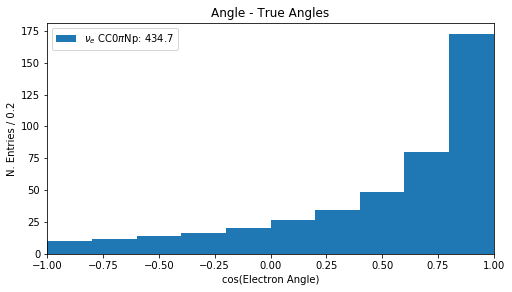

In [10]:
if isCombined == False:
    category_labels = {
        1 : r'$\nu_e$ CC0$\pi$Np', 
        2 : r'Out FV',
        3 : r'$\nu_\mu$ CC $\pi^{0}$',
        4 : r'$\nu_\mu$ CC',
        5 : r'$\nu_\mu$ NC $\pi^{0}$',
        6 : r'$\nu_\mu$ NC',
        7 : r'$\bar{\nu}_e$ CC0$\pi$Np',
        8: r'$\nu_e$ NC',
        9: r'$\nu_e$ CC other',
        10 : r'$\nu_e$ / $\overline{\nu_e}$  other', 
        11 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  $\pi^{0}$', 
        12 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  other',
        0: r'Unknown'
    }



    labels = [
                "%s: %.1f" % (category_labels[int(c)], sum(nue_nue_weights_tot[str(c)][0])) \
                if sum(nue_nue_weights_tot[str(c)][0]) else ""
                for c in nue_nue_vars_tot.keys()
            ]


    pup = list(nue_nue_vars_tot.values())

    i = 0
    for c in nue_nue_vars_tot.keys():
        nue_nue_vars_tot[str(c)] = pup[i][0]
        i = i + 1

    pup2 = list(nue_nue_weights_tot.values())

    i = 0
    for c in nue_nue_weights_tot.keys():
        nue_nue_weights_tot[str(c)] = pup2[i][0]
        i = i + 1



    nue_fig = plt.figure(figsize=(8, 7))
    nue_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
    nue_ax1 = plt.subplot(nue_gs[0])
    nue_ax1.set_xlim([-1, 1])

    VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Elec_asmuon',10,(-1.0, 1.0),"cos(Angle Diff)"

    nue_stacked = nue_ax1.hist(
                nue_nue_vars_tot.values(),
                weights=list(nue_nue_weights_tot.values()),
                stacked=True,
                label=labels,
                bins=BINS,
                range=RANGE)

    n_nue_tot = nue_stacked[0]

    plt.title("Angle - True Angles")
    plt.xlabel("cos(Electron Angle)")
    plt.ylabel("N. Entries / 0.2")
    plt.legend()

In [11]:
if isCombined == False:
    import importlib
    import Plotter_Functions_Alex
    importlib.reload(Plotter_Functions_Alex)
    from Plotter_Functions_Alex import getWantedLists
    importlib.reload(getWantedLists)

    #print(nue_stacked)

    #wanted_key = 5

    #nue_wanted_list = Plotter_Functions_Alex.getWantedLists.getWantedLists(wanted_key, nue_stacked)

    nue_wanted_list = n_nue_tot
    print(nue_wanted_list)

[  9.86174388  11.93508746  14.15381678  16.41497177  20.3938091
  26.36048745  34.40545213  48.72574113  80.02352253 172.446327  ]


In [12]:
#Data_signal - UNFOLDING INPUT
prior_true_signal = nue_wanted_list

print(prior_true_signal)
print(sum(prior_true_signal))

[  9.86174388  11.93508746  14.15381678  16.41497177  20.3938091
  26.36048745  34.40545213  48.72574113  80.02352253 172.446327  ]
434.72095923394994


In [13]:
if isCombined == False and isRun3 == False:
    print("saving!")
    np.savetxt("nue_full_500_catsel_nopions_angleDiff_usingSelection_prior_true_signal_recoCut_run1_"+ending+".csv", 
               prior_true_signal,
               delimiter =", ", 
               fmt ='% s')

saving!


## Now do Numu

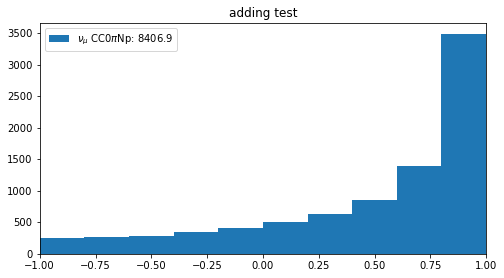

In [14]:
if isCombined == False:
    category_labels = {
        1 : r'$\nu_\mu$ CC0$\pi$Np', 
        2 : r'Out FV',
        3 : r'$\nu_e$ CC $\pi^{0}$',
        4 : r'$\nu_e$ CC',
        5 : r'$\nu_e$ NC $\pi^{0}$',
        6 : r'$\nu_e$ NC',
        7 : r'$\bar{\nu}_\mu$ CC0$\pi$Np',
        8: r'$\nu_\mu$ NC',
        9: r'$\nu_\mu$ CC other',
        10 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  other', 
        11 : r'$\nu_\mu$ / $\overline{\nu_e}$  $\pi^{0}$', 
        12 : r'$\nu_\mu$ / $\overline{\nu_e}$  other',
        0: r'Unknown'
    }


    labels = [
                "%s: %.1f" % (category_labels[int(c)], sum(numu_mc_weights_tot[str(c)][0])) \
                if sum(numu_mc_weights_tot[str(c)][0]) else ""
                for c in numu_mc_vars_tot.keys()
            ]


    pup = list(numu_mc_vars_tot.values())

    i = 0
    for c in numu_mc_vars_tot.keys():
        numu_mc_vars_tot[str(c)] = pup[i][0]
        i = i + 1

    pup2 = list(numu_mc_weights_tot.values())

    i = 0
    for c in numu_mc_weights_tot.keys():
        numu_mc_weights_tot[str(c)] = pup2[i][0]
        i = i + 1



    numu_fig = plt.figure(figsize=(8, 7))
    numu_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
    numu_ax1 = plt.subplot(numu_gs[0])
    numu_ax1.set_xlim([-1, 1])
    #numu_ax1.set_ylim([0, 14000])

    VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Muon',10,(-1.0, 1.0),"cos(Angle Diff)"

    numu_stacked = numu_ax1.hist(
                numu_mc_vars_tot.values(),
                weights=list(numu_mc_weights_tot.values()),
                stacked=True,
                label=labels,
                bins=BINS,
                range=RANGE)

    n_numu_tot = numu_stacked[0]

    plt.title("adding test")
    plt.legend()

In [15]:
if isCombined == False:
    import importlib
    import Plotter_Functions_Alex
    importlib.reload(Plotter_Functions_Alex)
    from Plotter_Functions_Alex import getWantedLists
    importlib.reload(getWantedLists)


    #wanted_key = 4

    #numu_wanted_list = Plotter_Functions_Alex.getWantedLists.getWantedLists(wanted_key, numu_stacked)

    numu_wanted_list = n_numu_tot

In [16]:
#Data_signal - UNFOLDING INPUT
prior_true_signal = numu_wanted_list

print(prior_true_signal)
print(sum(prior_true_signal))

[ 245.76979377  269.38303455  287.45565821  353.28773606  404.93434957
  499.97645032  624.47108941  849.1695983  1387.96673319 3484.49331031]
8406.907753680305


In [17]:
if isCombined == False and isRun3 == False:
    np.savetxt("numu_full_500_catsel_nopions_angleDiff_usingSelection_prior_true_signal_recoCut_run1_"+ending+".csv", 
               prior_true_signal,
               delimiter =", ", 
               fmt ='% s')

## Make a Combined Plot

[ 32.9445911   37.0391675   44.23746145  51.07127151  62.8087445
  79.21507822 106.97737057 159.47969775 272.57950016 724.49682829]


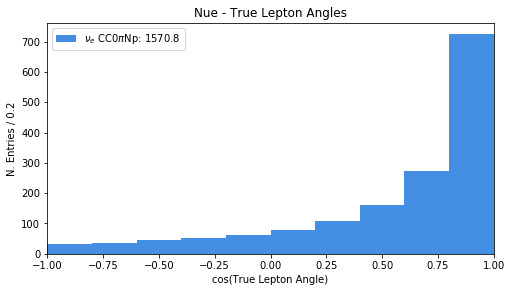

In [26]:
#################
####NUE#########
#################
if isCombined == True:
    category_labels = {
        1 : r'$\nu_e$ CC0$\pi$Np', 
        2 : r'Out FV',
        3 : r'$\nu_\mu$ CC $\pi^{0}$',
        4 : r'$\nu_\mu$ CC',
        5 : r'$\nu_\mu$ NC $\pi^{0}$',
        6 : r'$\nu_\mu$ NC',
        7 : r'$\bar{\nu}_e$ CC0$\pi$Np',
        8: r'$\nu_e$ NC',
        9: r'$\nu_e$ CC other',
        10 : r'$\nu_e$ / $\overline{\nu_e}$  other', 
        11 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  $\pi^{0}$', 
        12 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  other',
        0: r'Unknown'
    }


    ########################################
    pup = list(nue_nue_vars_tot_run1.values())

    i = 0
    for c in nue_nue_vars_tot_run1.keys():
        nue_nue_vars_tot_run1[str(c)] = pup[i][0]
        i = i + 1

    pup2 = list(nue_nue_weights_tot_run1.values())

    i = 0
    for c in nue_nue_weights_tot_run1.keys():
        nue_nue_weights_tot_run1[str(c)] = pup2[i][0]
        i = i + 1
    ############################################# 
    ############################################# 
    pup = list(nue_nue_vars_tot_run3.values())

    i = 0
    for c in nue_nue_vars_tot_run3.keys():
        nue_nue_vars_tot_run3[str(c)] = pup[i][0]
        i = i + 1

    pup2 = list(nue_nue_weights_tot_run3.values())

    i = 0
    for c in nue_nue_weights_tot_run3.keys():
        nue_nue_weights_tot_run3[str(c)] = pup2[i][0]
        i = i + 1
    ############################################# 

    def mergeDictionary(dict_1, dict_2):
        dict_3 = {**dict_1, **dict_2}
        for key, value in dict_3.items():
            if key in dict_1 and key in dict_2:
                    dict_3[key] = value + dict_1[key]
        return dict_3

    def combine_dicts(mydict):
        while len(mydict) > 1:
            i = 0
            dict_3 = mergeDictionary(mydict[i], mydict[i+1]) 
            mydict.pop(0)
            mydict[0] = dict_3
        return mydict

    varss = [nue_nue_vars_tot_run1, nue_nue_vars_tot_run3]
    weightss = [nue_nue_weights_tot_run1, nue_nue_weights_tot_run3]
    varss_tot = combine_dicts(varss)
    weightss_tot = combine_dicts(weightss)
    ############################################# 

    nue_fig = plt.figure(figsize=(8, 7))
    nue_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
    nue_ax1 = plt.subplot(nue_gs[0])
    #nue_ax1.set_xlim([0, 5])
    labels = [
                "%s: %.1f" % (category_labels[int(c)], sum(weightss_tot[0][str(c)])) \
                if sum(weightss_tot[0][str(c)]) else ""
                for c in varss_tot[0].keys()
            ]

    VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Elec_asmuon',10,(-1.0, 1.0),"cos(Angle Diff)"

    nue_stacked = nue_ax1.hist(
                varss_tot[0].values(),
                weights=list(weightss_tot[0].values()),
                stacked=True,
                label=labels,
                color = "#448ee4",
                bins=BINS,
                range=RANGE)



    #current_total_hist = (nue_stacked[0][-1])


    #nue_ax1.set_xlim([0, 5])    #TrueE, lepton mom
    #current_bincenters =  np.arange(0.25, 5.25, 0.5)
    #current_bincenters =  np.arange(-0.25, 4.75, 0.5)
    #current_bin_size = 0.5
    nue_ax1.set_xlim([-1, 1])    #AngleDiff
    current_bincenters =  np.arange(-0.9, 1.1, 0.2)
    current_bin_size = 0.2

    n_nue_tot = (nue_stacked[0])
    print(n_nue_tot)
    n_nue_tot = n_nue_tot


    #current_total_hist_comb = (nue_stacked_comb[0][-1])
    #current_total_hist = (nue_stacked[0])


    #nue_allsel_ax1.set_ylim([0, 50])

    plt.title("Nue - True Lepton Angles")
    plt.xlabel("cos(True Lepton Angle)")
    plt.ylabel("N. Entries / 0.2")
    plt.legend()

In [27]:
if isCombined == True:
    nue_wanted_list = n_nue_tot

In [28]:
if isCombined == True:
    #Data_signal - UNFOLDING INPUT
    prior_true_signal = nue_wanted_list

    print(prior_true_signal)
    print(sum(prior_true_signal))

[ 32.9445911   37.0391675   44.23746145  51.07127151  62.8087445
  79.21507822 106.97737057 159.47969775 272.57950016 724.49682829]
1570.8497110521298


In [29]:



if isCombined == True and noTune == False and MECTune == False:
    np.savetxt("nue_full_500_catsel_nopions_angleDiff_usingSelection_prior_true_signal_recoCut_comb_"+ending+".csv", 
               prior_true_signal,
               delimiter =", ", 
               fmt ='% s')
elif isCombined == True and noTune == True and MECTune == False:
    np.savetxt("nue_full_500_catsel_nopions_angleDiff_usingSelection_prior_true_signal_noTune_recoCut_comb_"+ending+".csv", 
               prior_true_signal,
               delimiter =", ", 
               fmt ='% s') 
elif isCombined == True and MECTune == True and noTune == False:
    np.savetxt("nue_full_500_catsel_nopions_angleDiff_usingSelection_prior_true_signal_MECTune_recoCut_comb_"+ending+".csv", 
               prior_true_signal,
               delimiter =", ", 
               fmt ='% s')    

[  715.15784607   862.25822593  1010.36471921  1207.74086589
  1440.99753943  1807.58692     2318.82727402  3314.33993775
  5399.31226777 15242.21455675]


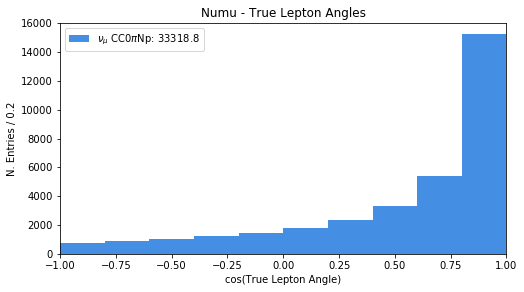

In [30]:
#################
####NUMU#########
#################

if isCombined == True:
    category_labels = {
        1 : r'$\nu_\mu$ CC0$\pi$Np', 
        2 : r'Out FV',
        3 : r'$\nu_e$ CC $\pi^{0}$',
        4 : r'$\nu_e$ CC',
        5 : r'$\nu_e$ NC $\pi^{0}$',
        6 : r'$\nu_e$ NC',
        7 : r'$\bar{\nu}_\mu$ CC0$\pi$Np',
        8: r'$\nu_\mu$ NC',
        9: r'$\nu_\mu$ CC other',
        10 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  other', 
        11 : r'$\nu_\mu$ / $\overline{\nu_e}$  $\pi^{0}$', 
        12 : r'$\nu_\mu$ / $\overline{\nu_e}$  other',
        0: r'Unknown'
    }


    ########################################
    pup = list(numu_mc_vars_tot_run1.values())

    i = 0
    for c in numu_mc_vars_tot_run1.keys():
        numu_mc_vars_tot_run1[str(c)] = pup[i][0]
        i = i + 1

    pup2 = list(numu_mc_weights_tot_run1.values())

    i = 0
    for c in numu_mc_weights_tot_run1.keys():
        numu_mc_weights_tot_run1[str(c)] = pup2[i][0]
        i = i + 1
    ############################################# 
    ############################################# 
    pup = list(numu_mc_vars_tot_run3.values())

    i = 0
    for c in numu_mc_vars_tot_run3.keys():
        numu_mc_vars_tot_run3[str(c)] = pup[i][0]
        i = i + 1

    pup2 = list(numu_mc_weights_tot_run3.values())

    i = 0
    for c in numu_mc_weights_tot_run3.keys():
        numu_mc_weights_tot_run3[str(c)] = pup2[i][0]
        i = i + 1
    ############################################# 

    def mergeDictionary(dict_1, dict_2):
        dict_3 = {**dict_1, **dict_2}
        for key, value in dict_3.items():
            if key in dict_1 and key in dict_2:
                    dict_3[key] = value + dict_1[key]
        return dict_3

    def combine_dicts(mydict):
        while len(mydict) > 1:
            i = 0
            dict_3 = mergeDictionary(mydict[i], mydict[i+1]) 
            mydict.pop(0)
            mydict[0] = dict_3
        return mydict

    varss = [numu_mc_vars_tot_run1, numu_mc_vars_tot_run3]
    weightss = [numu_mc_weights_tot_run1, numu_mc_weights_tot_run3]
    varss_tot = combine_dicts(varss)
    weightss_tot = combine_dicts(weightss)
    ############################################# 

    numu_fig = plt.figure(figsize=(8, 7))
    numu_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
    numu_ax1 = plt.subplot(numu_gs[0])
    numu_ax1.set_xlim([-1, 1])
    labels = [
                "%s: %.1f" % (category_labels[int(c)], sum(weightss_tot[0][str(c)])) \
                if sum(weightss_tot[0][str(c)]) else ""
                for c in varss_tot[0].keys()
            ]

    VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Muon',10,(-1.0, 1.0),"cos(Angle Diff)"


    numu_stacked = numu_ax1.hist(
                varss_tot[0].values(),
                weights=list(weightss_tot[0].values()),
                stacked=True,
                label=labels,
                color = "#448ee4",
                bins=BINS,
                range=RANGE)



    #current_total_hist = (nue_stacked[0][-1])


    #numu_ax1.set_xlim([0, 5])    #TrueE, lepton mom
    #current_bincenters =  np.arange(0.25, 5.25, 0.5)
    #current_bincenters =  np.arange(-0.25, 4.75, 0.5)
    #current_bin_size = 0.5
    nue_ax1.set_xlim([-1, 1])    #AngleDiff
    current_bincenters =  np.arange(-0.9, 1.1, 0.2)
    current_bin_size = 0.22

    n_numu_tot = (numu_stacked[0])
    print(n_numu_tot)
    n_numu_tot = n_numu_tot


    #current_total_hist_comb = (nue_stacked_comb[0][-1])
    #current_total_hist = (nue_stacked[0])


    #nue_allsel_ax1.set_ylim([0, 50])

    plt.title("Numu - True Lepton Angles")
    plt.xlabel("cos(True Lepton Angle)")
    plt.ylabel("N. Entries / 0.2")
    plt.legend()

In [31]:
if isCombined == True:
    numu_wanted_list = n_numu_tot

In [32]:
if isCombined == True:
    #Data_signal - UNFOLDING INPUT
    prior_true_signal = numu_wanted_list

    print(prior_true_signal)

[  715.15784607   862.25822593  1010.36471921  1207.74086589
  1440.99753943  1807.58692     2318.82727402  3314.33993775
  5399.31226777 15242.21455675]


In [33]:
if isCombined == True and noTune == False and MECTune == False:
    np.savetxt("numu_full_500_catsel_nopions_angleDiff_usingSelection_prior_true_signal_recoCut_comb_"+ending+".csv", 
               prior_true_signal,
               delimiter =", ", 
               fmt ='% s')
elif isCombined == True and noTune == True and MECTune == False:
    np.savetxt("numu_full_500_catsel_nopions_angleDiff_usingSelection_prior_true_signal_noTune_recoCut_comb_"+ending+".csv", 
               prior_true_signal,
               delimiter =", ", 
               fmt ='% s')
elif isCombined == True and noTune == False and MECTune == True:
    np.savetxt("numu_full_500_catsel_nopions_angleDiff_usingSelection_prior_true_signal_MECTune_recoCut_comb_"+ending+".csv", 
               prior_true_signal,
               delimiter =", ", 
               fmt ='% s')    
    

## Ratio Plot


bin_ratios:
[0.04451928693897323, 0.04223777704501422, 0.043042796384500474, 0.04227676480603967, 0.043817353615538256, 0.044733139379621145, 0.04695545166059374, 0.04838366863060055, 0.05049450398517581, 0.04704309064053734]


Making ratio plot.
count,  [-0.9, -0.7, -0.5, -0.3, -0.1, 0.1, 0.3, 0.5, 0.7, 0.9]
bins,  [-1.00000000e+00 -8.00000000e-01 -6.00000000e-01 -4.00000000e-01
 -2.00000000e-01 -2.22044605e-16  2.00000000e-01  4.00000000e-01
  6.00000000e-01  8.00000000e-01  1.00000000e+00]
Weights,  [0.04451928693897323, 0.04223777704501422, 0.043042796384500474, 0.04227676480603967, 0.043817353615538256, 0.044733139379621145, 0.04695545166059374, 0.04838366863060055, 0.05049450398517581, 0.04704309064053734]



Text(0.5, 1.0, 'Ratio')

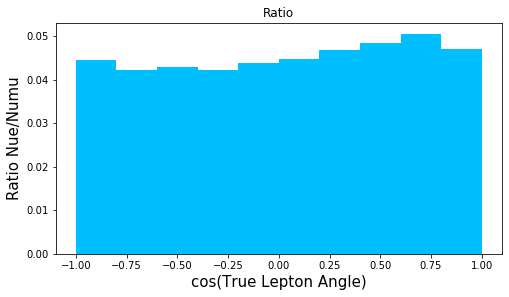

In [18]:
ratio_fig = plt.figure(figsize=(8, 7))
ratio_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
ratio_ax1 = plt.subplot(ratio_gs[0])

rbin_ratios = []

#This comes out of the above plots, be it R1, R3, or Combined
nue_ratio_nums = nue_wanted_list
numu_ratio_nums = numu_wanted_list

for i in range(len(numu_ratio_nums)):
    if nue_ratio_nums[i] > 0 and numu_ratio_nums[i] > 0:
        rratio = nue_ratio_nums[i]/numu_ratio_nums[i]
        rbin_ratios.append(rratio)
    else:
        rbin_ratios.append(0)

print("")
print("bin_ratios:")
print(rbin_ratios)
print("")

bins = np.arange(-1, 1.2, 0.2)
count = [-0.9, -0.7, -0.5, -0.3, -0.1, 0.1, 0.3, 0.5, 0.7, 0.9]
weights = []
for i in range(len(count)):
    weight = count[i]*rbin_ratios[i]
    weights.append(weight)

print("")
print("Making ratio plot.")
print("count, ", count)
print("bins, ", bins)
print("Weights, ", rbin_ratios)
print("")

sel = ratio_ax1.hist(count, bins, color='deepskyblue', weights=rbin_ratios)
ratio_ax1.set_ylabel('Ratio Nue/Numu', fontsize=15)
ratio_ax1.set_xlabel('cos(True Lepton Angle)', fontsize=15)
ratio_ax1.set_title("Ratio")

## Errors

### Get ratio stat errs

In [19]:
if isCombined == False:
    nue_nue_stat_errs = np.array(nue_nue_stat_errs)

    numu_mc_stat_errs = np.array(numu_mc_stat_errs)
elif isCombined == True:
    nue_nue_stat_errs_run1 = np.array(nue_nue_stat_errs_run1)
    numu_mc_stat_errs_run1 = np.array(numu_mc_stat_errs_run1)
    nue_nue_stat_errs_run3 = np.array(nue_nue_stat_errs_run3)
    numu_mc_stat_errs_run3 = np.array(numu_mc_stat_errs_run3)

### Expected Error Calculations

In [20]:
if isCombined == False:
    nue_exp_err    = np.sqrt(nue_nue_stat_errs)
    totalstat_nue = nue_nue_stat_errs
    print("totalstat_nue ",totalstat_nue )
    print("nue_exp_err ", nue_exp_err)
    print("")

    numu_exp_err    = np.sqrt(numu_mc_stat_errs)
    totalstat_numu = numu_mc_stat_errs
    print("totalstat_numu ",totalstat_numu )
    print("numu_exp_err ", numu_exp_err)
elif isCombined == True:
    nue_exp_err    = np.sqrt(nue_nue_stat_errs_run1 + nue_nue_stat_errs_run3)
    totalstat_nue = nue_nue_stat_errs_run1 + nue_nue_stat_errs_run3
    print("totalstat_nue ",totalstat_nue )
    print("nue_exp_err ", nue_exp_err)
    print("")
    #if noTune == True:
    #    np.savetxt("nue_prior_true_err_squared_angle_comb_"+ending+".csv", 
    #               totalstat_nue,
    #               delimiter =", ", 
    #               fmt ='% s')
    
    numu_exp_err    = np.sqrt(numu_mc_stat_errs_run1 + numu_mc_stat_errs_run3)
    totalstat_numu = numu_mc_stat_errs_run1 + numu_mc_stat_errs_run3
    print("totalstat_numu ",totalstat_numu )
    print("numu_exp_err ", numu_exp_err)
    
    #if noTune == True:
    #    np.savetxt("numu_prior_true_err_squared_angle_comb_"+ending+".csv", 
    #               totalstat_numu,
    #               delimiter =", ", 
    #               fmt ='% s')

totalstat_nue  [ 1.32858703  1.19590364  1.10680162  1.32292679  1.38120246  1.66235273
  2.20042579  3.48517107  6.16513652 19.78186737]
nue_exp_err  [1.1526435  1.09357379 1.05204639 1.15018555 1.1752457  1.28932258
 1.48338322 1.86686129 2.4829693  4.44768112]

totalstat_numu  [ 206.15552948  291.66089721  562.30630848  441.16016389  522.62665749
  662.58399994  747.0289022  1091.30615707 1627.24526037 5329.99414692]
numu_exp_err  [14.3581172  17.07808236 23.71299872 21.00381308 22.86102923 25.74070706
 27.33182947 33.03492329 40.33912816 73.00680891]


In [21]:
###########################################################
#Making cov matricies - the real errors
###########################################################

nue_cov           = np.zeros([len(nue_exp_err), len(nue_exp_err)])
nue_cov_mc_stat   = np.zeros([len(nue_exp_err), len(nue_exp_err)])
nue_cov_mc_detsys = np.zeros([len(nue_exp_err), len(nue_exp_err)])
nue_cov_data_stat = np.zeros([len(nue_exp_err), len(nue_exp_err)])

numu_cov           = np.zeros([len(numu_exp_err), len(numu_exp_err)])
numu_cov_mc_stat   = np.zeros([len(numu_exp_err), len(numu_exp_err)])
numu_cov_mc_detsys = np.zeros([len(numu_exp_err), len(numu_exp_err)])
numu_cov_data_stat = np.zeros([len(numu_exp_err), len(numu_exp_err)])

ratio_cov           = np.zeros([len(numu_exp_err), len(numu_exp_err)])
ratio_cov_mc_stat   = np.zeros([len(numu_exp_err), len(numu_exp_err)])
ratio_cov_mc_detsys = np.zeros([len(numu_exp_err), len(numu_exp_err)])
ratio_cov_data_stat = np.zeros([len(numu_exp_err), len(numu_exp_err)])

print(ratio_cov)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [22]:
if isCombined == False:
    nue_cov_mc_stat[np.diag_indices_from(nue_cov_mc_stat)]     = (nue_nue_stat_errs)
    print("nue_cov_mc_stat = ", np.diag(nue_cov_mc_stat))

    numu_cov_mc_stat[np.diag_indices_from(numu_cov_mc_stat)]     = (numu_mc_stat_errs)
    print("numu_cov_mc_stat = ", np.diag(numu_cov_mc_stat))
elif isCombined == True:
    nue_cov_mc_stat[np.diag_indices_from(nue_cov_mc_stat)]     = (nue_nue_stat_errs_run1 + nue_nue_stat_errs_run3 )
    print("nue_cov_mc_stat = ", np.diag(nue_cov_mc_stat))

    numu_cov_mc_stat[np.diag_indices_from(numu_cov_mc_stat)]     = (numu_mc_stat_errs_run1 + numu_mc_stat_errs_run3)
    print("numu_cov_mc_stat = ", np.diag(numu_cov_mc_stat))


#Now find the ratio error by combining the variances
squared_ratio_numbers = [number ** 2 for number in rbin_ratios]
dnue = np.diag(nue_cov_mc_stat)/(n_nue_tot**2)
dnumu = np.diag(numu_cov_mc_stat)/(n_numu_tot**2)
rratio_stat_errs = squared_ratio_numbers*((dnue) + (dnumu))


ratio_cov_mc_stat[np.diag_indices_from(ratio_cov_mc_stat)]     = rratio_stat_errs
print("ratio_cov_mc_stat = ", np.nan_to_num(np.diag(ratio_cov_mc_stat)))

nue_cov_mc_stat =  [ 1.32858703  1.19590364  1.10680162  1.32292679  1.38120246  1.66235273
  2.20042579  3.48517107  6.16513652 19.78186737]
numu_cov_mc_stat =  [ 206.15552948  291.66089721  562.30630848  441.16016389  522.62665749
  662.58399994  747.0289022  1091.30615707 1627.24526037 5329.99414692]
ratio_cov_mc_stat =  [4.17292254e-06 2.97908199e-06 2.69253193e-06 1.91409876e-06
 1.52469626e-06 1.23546046e-06 9.79295146e-07 7.55242140e-07
 4.98499376e-07 2.15876400e-07]


In [23]:
if noTune == True or MECTune == True:

    nue_cov_genie_only = (cov_nue_nue_genie_run1 + cov_nue_nue_genie_run3)

    numu_cov_genie_only = (cov_numu_mc_genie_run1 + cov_numu_mc_genie_run3)

    total_nue_cov_genie_only = nue_cov_genie_only + nue_cov_mc_stat
    total_numu_cov_genie_only = numu_cov_genie_only + numu_cov_mc_stat
    
    nue_exp_err = np.sqrt( np.diag((total_nue_cov_genie_only)))
    print(nue_exp_err)
    
    np.savetxt("nue_prior_true_err_genie_stat_only_angle_comb_"+ending+".csv", 
                   nue_exp_err,
                   delimiter =", ", 
                   fmt ='% s')

    numu_exp_err = np.sqrt( np.diag((total_numu_cov_genie_only)))
    print(numu_exp_err)
    
    np.savetxt("numu_prior_true_err_genie_stat_only_angle_comb_"+ending+".csv", 
                   numu_exp_err,
                   delimiter =", ", 
                   fmt ='% s')

In [24]:
#0.6% fractional value being added for nue
#3.2% fractional value being added for numu
#2.4% fractional value being added for ratio

#############################

#i.e. add 12.2%^2 * n total value ^2 (converting fractional to add to non fractional)

#frac_detsys_value_toreg = 0.01*(n_nue_tot*n_nue_tot)
#print(frac_detsys_value_toreg)
#nue_detsys_exp_err = np.full([len(numu_exp_err), len(numu_exp_err)], frac_detsys_value_toreg)

###########################

nue_detsys_errs = (0.006*0.006)*(n_nue_tot*n_nue_tot)
nue_cov_mc_detsys[np.diag_indices_from(nue_cov_mc_detsys)]   = (nue_detsys_errs)
print("nue_cov_mc_detsys = ", np.diag(nue_cov_mc_detsys))


nue_detsys_exp_err = np.sqrt(np.diag(nue_cov_mc_detsys))
nue_detsys_frac_err = nue_detsys_exp_err/(n_nue_tot)
print("totalstat_nue_detsys ", nue_detsys_errs )
print("nue_detsys_exp_err ", nue_detsys_exp_err)
print("nue_detsys_frac_err ", nue_detsys_frac_err)
print("")

#####################################################

numu_detsys_errs = (0.032*0.032)*(n_numu_tot*n_numu_tot)
numu_cov_mc_detsys[np.diag_indices_from(numu_cov_mc_detsys)]   = (numu_detsys_errs)
#nue_cov_mc_detsys[np.diag_indices_from(self.nue_cov_mc_detsys)] = (nue_sys_mc + nue_sys_nue + nue_sys_dirt)**2
print("numu_cov_mc_detsys = ", np.diag(numu_cov_mc_detsys))

numu_detsys_exp_err = np.sqrt(np.diag(numu_cov_mc_detsys))
numu_detsys_frac_err = numu_detsys_exp_err/n_numu_tot
print("totalstat_numu_detsys ", numu_detsys_errs )
print("numu_detsys_exp_err ", numu_detsys_exp_err)
print("numu_detsys_frac_err ", numu_detsys_frac_err)
print("")

#######################################################

ratio_detsys_errs = (0.024*0.024)*(np.array(rbin_ratios)*np.array(rbin_ratios))
ratio_cov_mc_detsys[np.diag_indices_from(ratio_cov_mc_detsys)]   = (ratio_detsys_errs)
#nue_cov_mc_detsys[np.diag_indices_from(self.nue_cov_mc_detsys)] = (nue_sys_mc + nue_sys_nue + nue_sys_dirt)**2
print("ratio_cov_mc_detsys = ", np.diag(ratio_cov_mc_detsys))

ratio_detsys_exp_err = np.sqrt(np.diag(ratio_cov_mc_detsys))
ratio_detsys_frac_err = ratio_detsys_exp_err/rbin_ratios
print("totalstat_ratio_detsys ", ratio_detsys_errs )
print("ratio_detsys_exp_err ", ratio_detsys_exp_err)
print("ratio_detsys_frac_err ", ratio_detsys_frac_err)
print("")

#######################################################

nue_cov_mc_detsys =  [ 0.02970322  0.03699977  0.05322227  0.07097689  0.10810146  0.17423878
  0.31184442  0.67397433  1.89914487 11.65375061]
totalstat_nue_detsys  [ 0.02970322  0.03699977  0.05322227  0.07097689  0.10810146  0.17423878
  0.31184442  0.67397433  1.89914487 11.65375061]
nue_detsys_exp_err  [0.17234622 0.19235324 0.23069953 0.26641488 0.32878786 0.41741919
 0.55843032 0.8209594  1.37809465 3.41375902]
nue_detsys_frac_err  [0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006]

numu_cov_mc_detsys =  [   426.28943793    589.92167008    817.12769447   1129.56421908
   1601.53602517   2476.75768654   4023.12375378   8189.23293047
  21186.89572236 149786.08972181]
totalstat_numu_detsys  [   426.28943793    589.92167008    817.12769447   1129.56421908
   1601.53602517   2476.75768654   4023.12375378   8189.23293047
  21186.89572236 149786.08972181]
numu_detsys_exp_err  [ 20.64677791  24.28830315  28.5854455   33.60899015  40.01919571
  49.76703413  63.42809909  90.494

### Now need the systematic errors

In [25]:
if isCombined == False:
    nue_cov = (cov_nue_nue_ppfx + cov_nue_nue_genie + cov_nue_nue_reint)
    nue_cov += (cov_nue_nue_geo)

    numu_cov = (cov_numu_mc_ppfx + cov_numu_mc_genie + cov_numu_mc_reint)
    numu_cov += (cov_numu_mc_geo)
elif isCombined == True:
    nue_cov = (cov_nue_nue_ppfx_run1 + cov_nue_nue_genie_run1 + cov_nue_nue_reint_run1 + cov_nue_nue_ppfx_run3 + cov_nue_nue_genie_run3 + cov_nue_nue_reint_run3)
    #nue_cov = (cov_nue_nue_ppfx_run1+ cov_nue_nue_ppfx_run3)
    nue_cov += (cov_nue_nue_geo_run1 + cov_nue_nue_geo_run3)

    numu_cov = (cov_numu_mc_ppfx_run1 + cov_numu_mc_genie_run1 + cov_numu_mc_reint_run1 + cov_numu_mc_ppfx_run3 + cov_numu_mc_genie_run3 + cov_numu_mc_reint_run3 )
    #numu_cov = (cov_numu_mc_genie_run1  )
    numu_cov += (cov_numu_mc_geo_run1 + cov_numu_mc_geo_run3)

In [26]:
nue_exp_err = np.sqrt( np.diag((nue_cov + nue_cov_mc_stat + nue_cov_mc_detsys)))

numu_exp_err = np.sqrt( np.diag((numu_cov + numu_cov_mc_stat + numu_cov_mc_detsys)))

print("")
print("nue_exp_err ", nue_exp_err)
print("")
nue_frac_err = np.nan_to_num(nue_exp_err / n_nue_tot)
print("nue_frac_err ",nue_frac_err)
print("")
print("numu_exp_err ", numu_exp_err)
numu_frac_err = np.nan_to_num(numu_exp_err / n_numu_tot)
print("")
print("numu_frac_err ", numu_frac_err)


nue_exp_err  [  5.51191747   5.86647755   7.09414571   8.41108537   9.8376153
  12.5771772   16.1266425   24.41334535  40.51372945 120.48921854]

nue_frac_err  [0.19188994 0.18299076 0.18450351 0.18942828 0.17952516 0.18078484
 0.17327113 0.17842548 0.17639019 0.21177104]

numu_exp_err  [ 102.07644119  116.28377987  143.82387498  161.61464219  193.61759327
  245.62311372  307.03540566  438.64365458  714.38741247 2469.7992624 ]

numu_frac_err  [0.1582061  0.15320465 0.16100375 0.15387753 0.15481978 0.15793466
 0.1549019  0.15511015 0.1570544  0.20420948]


In [27]:
total_nue_cov = nue_cov + nue_cov_mc_stat + nue_cov_mc_detsys
total_numu_cov = numu_cov + numu_cov_mc_stat + numu_cov_mc_detsys

#total_nue_cov = nue_cov
#total_numu_cov = numu_cov

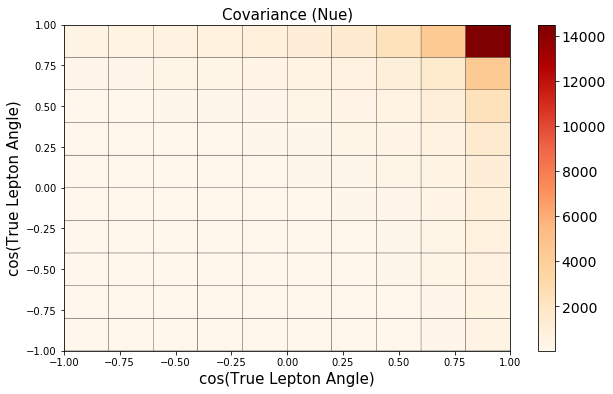

In [28]:
fig = plt.figure(figsize=(10, 6))
        
bins = np.arange(-1, 1.2, 0.2)
plt.pcolor(bins, bins, total_nue_cov, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
#plt.pcolor(bins, bins, nue_cov, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)


plt.xlabel("cos(True Lepton Angle)", fontsize=15)
plt.ylabel("cos(True Lepton Angle)", fontsize=15)


plt.title('Covariance (Nue)', fontsize=15)

if isCombined == True:
    plt.savefig("Nue_Full_Truth_Cov_angleDiff_"+ending+".svg", bbox_inches='tight')

plt.show()

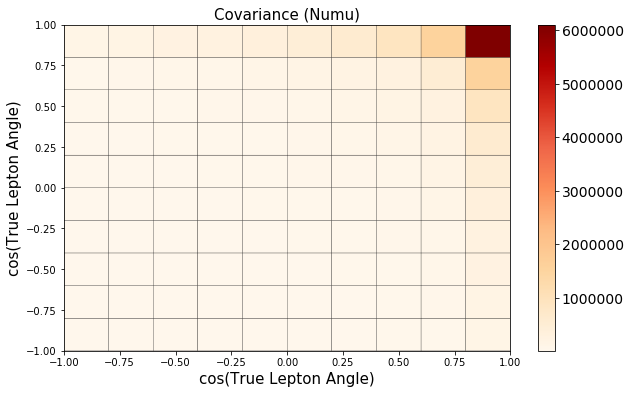

In [29]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, total_numu_cov, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)


plt.xlabel("cos(True Lepton Angle)", fontsize=15)
plt.ylabel("cos(True Lepton Angle)", fontsize=15)


plt.title('Covariance (Numu)', fontsize=15)

if isCombined == True:
    plt.savefig("Numu_Full_Truth_Cov_angleDiff_"+ending+".svg", bbox_inches='tight')

plt.show()

In [30]:
nue_frac_cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

for i in range(len(bins)-1): 

    for j in range(len(bins)-1): 

        c = total_nue_cov[i][j]
        
        if n_nue_tot[i]*n_nue_tot[j] != 0:
            nue_frac_cov[i][j] += c/(n_nue_tot[i]*n_nue_tot[j])
            
print(nue_frac_cov)
print("")
print(np.sqrt(np.diag(nue_frac_cov)))
print("")

############################################

numu_frac_cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

for i in range(len(bins)-1): 

    for j in range(len(bins)-1): 

        c = total_numu_cov[i][j]
        
        if n_numu_tot[i]*n_numu_tot[j] != 0:
            numu_frac_cov[i][j] += c/(n_numu_tot[i]*n_numu_tot[j])

print("")
print(numu_frac_cov)
print("")
print(np.sqrt(np.diag(numu_frac_cov)))

[[0.03682174761618038, 0.032956570139288204, 0.03358493348498723, 0.03443305427571359, 0.032681367939497497, 0.032306247586080215, 0.0314790122953773, 0.03260835700525772, 0.03179366379638894, 0.03269127040024964], [0.032956570139288204, 0.03348561854518711, 0.032189164872978585, 0.033178186059658936, 0.031525267561958004, 0.0313222773830629, 0.030402654053535705, 0.031320935033772736, 0.030570687119759854, 0.030971827746102347], [0.03358493348498723, 0.032189164872978585, 0.03404154618007207, 0.033838365877360686, 0.032107111446730896, 0.0319809580285755, 0.030929648510467093, 0.031803293380586475, 0.030873973933833905, 0.030697984883985868], [0.03443305427571359, 0.033178186059658936, 0.033838365877360686, 0.03588307228880186, 0.03305776322499428, 0.03303443512335673, 0.031917479484203294, 0.03288373502481397, 0.03198801902416996, 0.03206575986695551], [0.032681367939497497, 0.031525267561958004, 0.032107111446730896, 0.03305776322499428, 0.032229281701274516, 0.03162666147307967, 0.

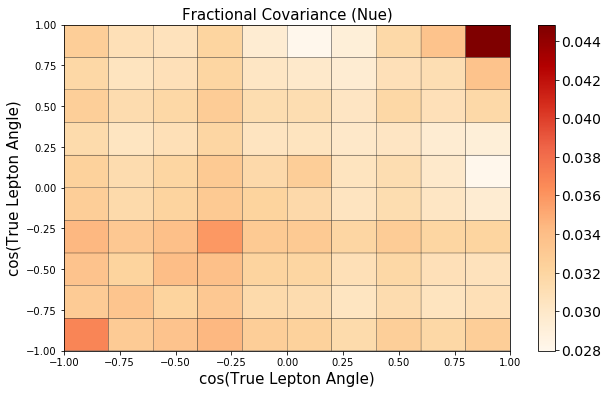

In [31]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, nue_frac_cov, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)


plt.xlabel("cos(True Lepton Angle)", fontsize=15)
plt.ylabel("cos(True Lepton Angle)", fontsize=15)


plt.title('Fractional Covariance (Nue)', fontsize=15)

if isCombined == True:
    plt.savefig("Nue_Full_Truth_FracCov_angleDiff_"+ending+".svg", bbox_inches='tight')

plt.show()

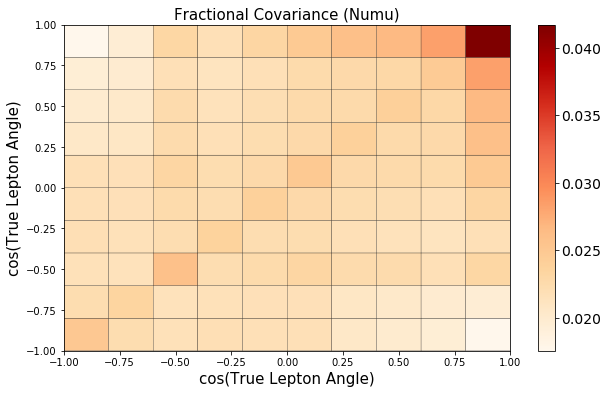

In [32]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, numu_frac_cov, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)


plt.xlabel("cos(True Lepton Angle)", fontsize=15)
plt.ylabel("cos(True Lepton Angle)", fontsize=15)


plt.title('Fractional Covariance (Numu)', fontsize=15)

if isCombined == True:
    plt.savefig("Numu_Full_Truth_FracCov_angleDiff_"+ending+".svg", bbox_inches='tight')

plt.show()

In [33]:
##########################
nue_cor = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

# compute the corr matrix 
#nue_cov = (cov_nue_nue_ppfx_run1 + cov_nue_nue_genie_run1 + cov_nue_nue_reint_run1 + cov_nue_nue_ppfx_run3 + cov_nue_nue_genie_run3 + cov_nue_nue_reint_run3)
#nue_cov += (cov_nue_nue_geo_run1 + cov_nue_nue_geo_run3)
#nue_cov + nue_cov_mc_stat + nue_cov_mc_detsys
#total_nue_cov = nue_cov


for i in range(len(total_nue_cov)): 
    for j in range(len(total_nue_cov[i])): 

        if np.sqrt(total_nue_cov[i][i])*np.sqrt(total_nue_cov[j][j]) != 0: 
            nue_cor[i][j] = total_nue_cov[i][j] / (np.sqrt(total_nue_cov[i][i])*np.sqrt(total_nue_cov[j][j]))
            
##########################

numu_cor = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

# compute the corr matrix 

for i in range(len(total_numu_cov)): 
    for j in range(len(total_numu_cov[i])): 

        if np.sqrt(total_numu_cov[i][i])*np.sqrt(total_numu_cov[j][j]) != 0: 
            numu_cor[i][j] = total_numu_cov[i][j] / (np.sqrt(total_numu_cov[i][i])*np.sqrt(total_numu_cov[j][j]))    


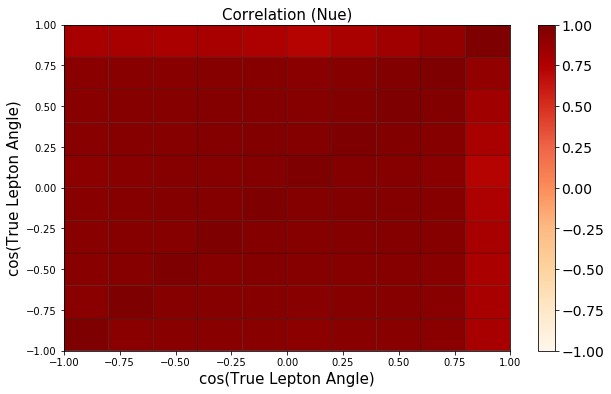

In [34]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, nue_cor, cmap='OrRd', edgecolors='k', vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)


plt.xlabel("cos(True Lepton Angle)", fontsize=15)
plt.ylabel("cos(True Lepton Angle)", fontsize=15)


plt.title('Correlation (Nue)', fontsize=15)

plt.savefig("Nue_Full_Truth_Cor_angleDiff_"+ending+".svg", bbox_inches='tight')

plt.show()

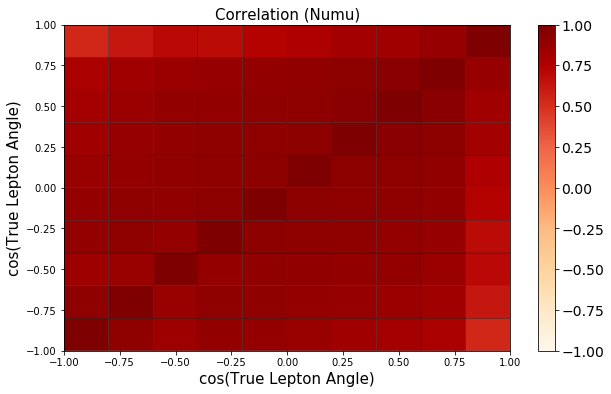

In [35]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, numu_cor, cmap='OrRd', edgecolors='k', vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)


plt.xlabel("cos(True Lepton Angle)", fontsize=15)
plt.ylabel("cos(True Lepton Angle)", fontsize=15)


plt.title('Correlation (Numu)', fontsize=15)

plt.savefig("Numu_Full_Truth_Cor_angleDiff_"+ending+".svg", bbox_inches='tight')

plt.show()

### Ratio Sys Errors

In [36]:
#####CORRECT way of doing ratio errors##########
##################
#### ppfx ##########
##################


####First get the central value to compare against. We have already got this above. 
#This will come from plots, so irrelevant if from R1, R3, or Combined
nue_central_values = nue_wanted_list
numu_central_values = numu_wanted_list

rbin_cv_ratios = []
for i in range(len(numu_central_values)):
    if nue_central_values[i] > 0 and numu_central_values[i] > 0:
        rratio = nue_central_values[i]/numu_central_values[i]
        rbin_cv_ratios.append(rratio)
    else:
        rbin_cv_ratios.append(0)


#######Now, get each universe###########################
Nuniverse = 500
n_bins = 10
x_range = (-1.0, 1.0)

n_tot = np.empty([Nuniverse, n_bins])
n_tot.fill(0)

if isCombined == False:
    ##Nue
    s_n = nue_nue_df_ppfx
    df_n = pd.DataFrame(s_n.values.tolist())

    variable_nue = nue_nue_df_ppfx_vars.squeeze()
    spline_fix_var_nue = pd.DataFrame(nue_nue_df_ppfx_splines)
    spline_fix_var_nue = spline_fix_var_nue.squeeze()

    ##Numu
    s_m = numu_mc_df_ppfx
    df_m = pd.DataFrame(s_m.values.tolist())

    variable_numu = numu_mc_df_ppfx_vars.squeeze()
    #variable_numu = variable_numu["nu_e"] 
    spline_fix_var_numu = pd.DataFrame(numu_mc_df_ppfx_splines)
    spline_fix_var_numu = spline_fix_var_numu.squeeze()
    #spline_fix_var_numu = spline_fix_var_numu["weightSplineTimesTuneTimesPPFX"]


    ##Ratio
    if (not df_n.empty) and (not df_m.empty):
        for i in range(Nuniverse):
            weight_n = df_n[i].values / 1000.
            weight_n[np.isnan(weight_n)] = 1
            weight_n[weight_n > 100] = 1
            weight_n[weight_n < 0] = 1
            weight_n[weight_n == np.inf] = 1
            weight_m = df_m[i].values / 1000.
            weight_m[np.isnan(weight_m)] = 1
            weight_m[weight_m > 100] = 1
            weight_m[weight_m < 0] = 1
            weight_m[weight_m == np.inf] = 1
            n_n, bins = np.histogram(
                variable_nue, weights=weight_n*spline_fix_var_nue, range=x_range, bins=n_bins)
            n_m, bins = np.histogram(
                variable_numu, weights=weight_m*spline_fix_var_numu, range=x_range, bins=n_bins)
            rbin_ratios_sys = []

            for g in range(len(n_n)):
                if n_n[g] > 0 and n_m[g] > 0:
                    rratio = n_n[g]/n_m[g]
                    rbin_ratios_sys.append(rratio)
                else:
                    rbin_ratios_sys.append(0)

            n_tot[i] += rbin_ratios_sys 
            
elif isCombined == True:
    ##Nue
    s_n_run1 = nue_nue_df_ppfx_run1
    df_n_run1 = pd.DataFrame(s_n_run1.values.tolist())

    variable_nue_run1 = nue_nue_df_ppfx_vars_run1.squeeze()
    spline_fix_var_nue_run1 = pd.DataFrame(nue_nue_df_ppfx_splines_run1)
    spline_fix_var_nue_run1 = spline_fix_var_nue_run1.squeeze()
    
    s_n_run3 = nue_nue_df_ppfx_run3
    df_n_run3 = pd.DataFrame(s_n_run3.values.tolist())

    variable_nue_run3 = nue_nue_df_ppfx_vars_run3.squeeze()
    spline_fix_var_nue_run3 = pd.DataFrame(nue_nue_df_ppfx_splines_run3)
    spline_fix_var_nue_run3 = spline_fix_var_nue_run3.squeeze()

    ##Numu
    s_m_run1 = numu_mc_df_ppfx_run1
    df_m_run1= pd.DataFrame(s_m_run1.values.tolist())

    variable_numu_run1 = numu_mc_df_ppfx_vars_run1.squeeze()
    spline_fix_var_numu_run1 = pd.DataFrame(numu_mc_df_ppfx_splines_run1)
    spline_fix_var_numu_run1 = spline_fix_var_numu_run1.squeeze()
    
    s_m_run3 = numu_mc_df_ppfx_run3
    df_m_run3= pd.DataFrame(s_m_run3.values.tolist())

    variable_numu_run3 = numu_mc_df_ppfx_vars_run3.squeeze()
    spline_fix_var_numu_run3 = pd.DataFrame(numu_mc_df_ppfx_splines_run3)
    spline_fix_var_numu_run3 = spline_fix_var_numu_run3.squeeze()
    


    ##Ratio
    if ((not df_n_run1.empty) or (not df_n_run3.empty)) and ((not df_m_run1.empty) or (not df_m_run3.empty)):
        for i in range(Nuniverse):
            weight_n_run1 = df_n_run1[i].values / 1000.   ###
            weight_n_run1[np.isnan(weight_n_run1)] = 1
            weight_n_run1[weight_n_run1 > 100] = 1
            weight_n_run1[weight_n_run1 < 0] = 1
            weight_n_run1[weight_n_run1 == np.inf] = 1
            weight_n_run3 = df_n_run3[i].values / 1000.   ###
            weight_n_run3[np.isnan(weight_n_run3)] = 1
            weight_n_run3[weight_n_run3 > 100] = 1
            weight_n_run3[weight_n_run3 < 0] = 1
            weight_n_run3[weight_n_run3 == np.inf] = 1
            weight_m_run1 = df_m_run1[i].values / 1000.   ###
            weight_m_run1[np.isnan(weight_m_run1)] = 1
            weight_m_run1[weight_m_run1 > 100] = 1
            weight_m_run1[weight_m_run1 < 0] = 1
            weight_m_run1[weight_m_run1 == np.inf] = 1
            weight_m_run3 = df_m_run3[i].values / 1000.   ###
            weight_m_run3[np.isnan(weight_m_run3)] = 1
            weight_m_run3[weight_m_run3 > 100] = 1
            weight_m_run3[weight_m_run3 < 0] = 1
            weight_m_run3[weight_m_run3 == np.inf] = 1
            n_n_run1, bins = np.histogram(
                variable_nue_run1, weights=weight_n_run1*spline_fix_var_nue_run1, range=x_range, bins=n_bins)
            n_n_run3, bins = np.histogram(
                variable_nue_run3, weights=weight_n_run3*spline_fix_var_nue_run3, range=x_range, bins=n_bins)
            n_m_run1, bins = np.histogram(
                variable_numu_run1, weights=weight_m_run1*spline_fix_var_numu_run1, range=x_range, bins=n_bins)
            n_m_run3, bins = np.histogram(
                variable_numu_run3, weights=weight_m_run3*spline_fix_var_numu_run3, range=x_range, bins=n_bins)
            rbin_ratios_sys = []
            
            n_n = n_n_run1 + n_n_run3
            n_m = n_m_run1 + n_m_run3

            for g in range(len(n_n)):
                if n_n[g] > 0 and n_m[g] > 0:
                    rratio = n_n[g]/n_m[g]
                    rbin_ratios_sys.append(rratio)
                else:
                    rbin_ratios_sys.append(0)

            n_tot[i] += rbin_ratios_sys             

        
##Cov matrix

cov_ratio_ppfx = np.empty([len(rbin_cv_ratios), len(rbin_cv_ratios)])
cov_ratio_ppfx.fill(0)

n_cv_tot = rbin_cv_ratios

a = -1
for n in n_tot:
    a = a + 1
    for i in range(len(rbin_cv_ratios)):
        for j in range(len(rbin_cv_ratios)):
            cov_ratio_ppfx[i][j] += (n[i] - n_cv_tot[i]) * (n[j] - n_cv_tot[j])

                
cov_ratio_ppfx /= Nuniverse
print("")
print("cov of ratio sys error = ", cov_ratio_ppfx)
print("--------------------------------------------------")
print("")



cov of ratio sys error =  [[3.53059266e-05 2.92044226e-05 3.53584607e-05 3.36829034e-05
  3.27988400e-05 3.26954951e-05 3.20997355e-05 3.21662889e-05
  2.85967067e-05 1.77735608e-05]
 [2.92044226e-05 2.63303683e-05 3.09808618e-05 2.87807063e-05
  2.81895464e-05 2.83478644e-05 2.72126990e-05 2.77652063e-05
  2.45337464e-05 1.51545628e-05]
 [3.53584607e-05 3.09808618e-05 3.93397822e-05 3.48880323e-05
  3.45368927e-05 3.49502068e-05 3.33290601e-05 3.41835892e-05
  3.01701759e-05 1.90318377e-05]
 [3.36829034e-05 2.87807063e-05 3.48880323e-05 3.39524015e-05
  3.21856806e-05 3.20607624e-05 3.12470352e-05 3.16936435e-05
  2.77914996e-05 1.66483018e-05]
 [3.27988400e-05 2.81895464e-05 3.45368927e-05 3.21856806e-05
  3.18477616e-05 3.16745559e-05 3.06942642e-05 3.13216522e-05
  2.77115204e-05 1.73394169e-05]
 [3.26954951e-05 2.83478644e-05 3.49502068e-05 3.20607624e-05
  3.16745559e-05 3.27005270e-05 3.11437392e-05 3.15646793e-05
  2.85844637e-05 1.86285437e-05]
 [3.20997355e-05 2.72126990e-05

In [37]:
#####CORRECT way of doing ratio errors##########
##################
#### genie ##########
##################


####First get the central value to compare against. We have already got this above. 
nue_central_values = nue_wanted_list
numu_central_values = numu_wanted_list


rbin_cv_ratios = []
for i in range(len(numu_central_values)):
    if nue_central_values[i] > 0 and numu_central_values[i] > 0:
        rratio = nue_central_values[i]/numu_central_values[i]
        rbin_cv_ratios.append(rratio)
    else:
        rbin_cv_ratios.append(0)


#######Now, get each universe###########################
Nuniverse = 500
n_bins = 10
x_range = (-1.0, 1.0)

n_tot = np.empty([Nuniverse, n_bins])
n_tot.fill(0)

if isCombined == False:
    ##Nue
    s_n = nue_nue_df_genie
    df_n = pd.DataFrame(s_n.values.tolist())

    variable_nue = nue_nue_df_genie_vars.squeeze()
    #variable_nue = variable_nue["nu_e"] 
    spline_fix_var_nue = pd.DataFrame(nue_nue_df_genie_splines)
    spline_fix_var_nue = spline_fix_var_nue.squeeze()
    #print(spline_fix_var_nue)
    #spline_fix_var_nue = spline_fix_var_nue["weightSpline"]

    ##Numu
    s_m = numu_mc_df_genie
    df_m = pd.DataFrame(s_m.values.tolist())

    variable_numu = numu_mc_df_genie_vars.squeeze()
    #variable_numu = variable_numu["nu_e"] 
    spline_fix_var_numu = pd.DataFrame(numu_mc_df_genie_splines)
    spline_fix_var_numu = spline_fix_var_numu.squeeze()
    #spline_fix_var_numu = spline_fix_var_numu["weightSpline"]


    ##Ratio
    if (not df_n.empty) and (not df_m.empty):
        for i in range(Nuniverse):
            weight_n = df_n[i].values / 1000.
            weight_n[np.isnan(weight_n)] = 1
            weight_n[weight_n > 100] = 1
            weight_n[weight_n < 0] = 1
            weight_n[weight_n == np.inf] = 1
            weight_m = df_m[i].values / 1000.
            weight_m[np.isnan(weight_m)] = 1
            weight_m[weight_m > 100] = 1
            weight_m[weight_m < 0] = 1
            weight_m[weight_m == np.inf] = 1
            n_n, bins = np.histogram(
                variable_nue, weights=weight_n*spline_fix_var_nue, range=x_range, bins=n_bins)
            n_m, bins = np.histogram(
                variable_numu, weights=weight_m*spline_fix_var_numu, range=x_range, bins=n_bins)

            rbin_ratios_sys = []

            for g in range(len(n_n)):
                if n_n[g] > 0 and n_m[g] > 0:
                    rratio = n_n[g]/n_m[g]
                    rbin_ratios_sys.append(rratio)
                else:
                    rbin_ratios_sys.append(0)

            n_tot[i] += rbin_ratios_sys 
            
elif isCombined == True:
    ##Nue
    s_n_run1 = nue_nue_df_genie_run1
    df_n_run1 = pd.DataFrame(s_n_run1.values.tolist())

    variable_nue_run1 = nue_nue_df_genie_vars_run1.squeeze()
    spline_fix_var_nue_run1 = pd.DataFrame(nue_nue_df_genie_splines_run1)
    spline_fix_var_nue_run1 = spline_fix_var_nue_run1.squeeze()
    
    s_n_run3 = nue_nue_df_genie_run3
    df_n_run3 = pd.DataFrame(s_n_run3.values.tolist())

    variable_nue_run3 = nue_nue_df_genie_vars_run3.squeeze()
    spline_fix_var_nue_run3 = pd.DataFrame(nue_nue_df_genie_splines_run3)
    spline_fix_var_nue_run3 = spline_fix_var_nue_run3.squeeze()

    ##Numu
    s_m_run1 = numu_mc_df_genie_run1
    df_m_run1= pd.DataFrame(s_m_run1.values.tolist())

    variable_numu_run1 = numu_mc_df_genie_vars_run1.squeeze()
    spline_fix_var_numu_run1 = pd.DataFrame(numu_mc_df_genie_splines_run1)
    spline_fix_var_numu_run1 = spline_fix_var_numu_run1.squeeze()
    
    s_m_run3 = numu_mc_df_genie_run3
    df_m_run3= pd.DataFrame(s_m_run3.values.tolist())

    variable_numu_run3 = numu_mc_df_genie_vars_run3.squeeze()
    spline_fix_var_numu_run3 = pd.DataFrame(numu_mc_df_genie_splines_run3)
    spline_fix_var_numu_run3 = spline_fix_var_numu_run3.squeeze()
    


    ##Ratio
    if ((not df_n_run1.empty) or (not df_n_run3.empty)) and ((not df_m_run1.empty) or (not df_m_run3.empty)):
        for i in range(Nuniverse):
            weight_n_run1 = df_n_run1[i].values / 1000.   ###
            weight_n_run1[np.isnan(weight_n_run1)] = 1
            weight_n_run1[weight_n_run1 > 100] = 1
            weight_n_run1[weight_n_run1 < 0] = 1
            weight_n_run1[weight_n_run1 == np.inf] = 1
            weight_n_run3 = df_n_run3[i].values / 1000.   ###
            weight_n_run3[np.isnan(weight_n_run3)] = 1
            weight_n_run3[weight_n_run3 > 100] = 1
            weight_n_run3[weight_n_run3 < 0] = 1
            weight_n_run3[weight_n_run3 == np.inf] = 1
            weight_m_run1 = df_m_run1[i].values / 1000.   ###
            weight_m_run1[np.isnan(weight_m_run1)] = 1
            weight_m_run1[weight_m_run1 > 100] = 1
            weight_m_run1[weight_m_run1 < 0] = 1
            weight_m_run1[weight_m_run1 == np.inf] = 1
            weight_m_run3 = df_m_run3[i].values / 1000.   ###
            weight_m_run3[np.isnan(weight_m_run3)] = 1
            weight_m_run3[weight_m_run3 > 100] = 1
            weight_m_run3[weight_m_run3 < 0] = 1
            weight_m_run3[weight_m_run3 == np.inf] = 1
            n_n_run1, bins = np.histogram(
                variable_nue_run1, weights=weight_n_run1*spline_fix_var_nue_run1, range=x_range, bins=n_bins)
            n_n_run3, bins = np.histogram(
                variable_nue_run3, weights=weight_n_run3*spline_fix_var_nue_run3, range=x_range, bins=n_bins)
            n_m_run1, bins = np.histogram(
                variable_numu_run1, weights=weight_m_run1*spline_fix_var_numu_run1, range=x_range, bins=n_bins)
            n_m_run3, bins = np.histogram(
                variable_numu_run3, weights=weight_m_run3*spline_fix_var_numu_run3, range=x_range, bins=n_bins)
            rbin_ratios_sys = []
            
            n_n = n_n_run1 + n_n_run3
            n_m = n_m_run1 + n_m_run3

            for g in range(len(n_n)):
                if n_n[g] > 0 and n_m[g] > 0:
                    rratio = n_n[g]/n_m[g]
                    rbin_ratios_sys.append(rratio)
                else:
                    rbin_ratios_sys.append(0)

            n_tot[i] += rbin_ratios_sys 
        
##Cov matrix

cov_ratio_genie = np.empty([len(rbin_cv_ratios), len(rbin_cv_ratios)])
cov_ratio_genie.fill(0)

n_cv_tot = rbin_cv_ratios

for n in n_tot:
    for i in range(len(rbin_cv_ratios)):
        for j in range(len(rbin_cv_ratios)):
            cov_ratio_genie[i][j] += (n[i] - n_cv_tot[i]) * (n[j] - n_cv_tot[j])

cov_ratio_genie /= Nuniverse
print("")
print("cov of ratio sys error = ", cov_ratio_genie)
print("--------------------------------------------------")
print("")


cov of ratio sys error =  [[ 3.86995390e-06  2.09512230e-06  1.70428948e-07  7.91013880e-07
  -1.39001762e-06 -2.61871483e-06 -2.91969021e-06 -1.87001300e-06
  -8.02232936e-07 -3.27182094e-07]
 [ 2.09512230e-06  1.43569899e-06  4.31220124e-07  7.06249107e-07
  -3.40073945e-07 -8.57278610e-07 -1.12586898e-06 -5.93623353e-07
  -2.17292942e-07 -2.23764436e-07]
 [ 1.70428948e-07  4.31220124e-07  8.15483552e-07  5.88227584e-07
   6.49241380e-07  8.72756953e-07  6.90247857e-07  6.10515568e-07
   3.29954376e-07 -5.68791745e-08]
 [ 7.91013880e-07  7.06249107e-07  5.88227584e-07  7.17410244e-07
   4.14528030e-07  3.18665805e-07  1.16238730e-07  2.32766443e-07
   1.19202828e-07 -1.21454961e-07]
 [-1.39001762e-06 -3.40073945e-07  6.49241380e-07  4.14528030e-07
   1.67712634e-06  2.32580785e-06  2.23590149e-06  1.71817892e-06
   7.42437839e-07  1.98184665e-08]
 [-2.61871483e-06 -8.57278610e-07  8.72756953e-07  3.18665805e-07
   2.32580785e-06  3.64029048e-06  3.54540219e-06  2.62031127e-06
   1.1

In [38]:
#####CORRECT way of doing ratio errors##########
##################
#### reint ##########
##################


####First get the central value to compare against. We have already got this above. 
nue_central_values = nue_wanted_list
numu_central_values = numu_wanted_list


rbin_cv_ratios = []
for i in range(len(numu_central_values)):
    if nue_central_values[i] > 0 and numu_central_values[i] > 0:
        rratio = nue_central_values[i]/numu_central_values[i]
        rbin_cv_ratios.append(rratio)
    else:
        rbin_cv_ratios.append(0)


#######Now, get each universe###########################
Nuniverse = 500
n_bins = 10
x_range = (-1.0, 1.0)

n_tot = np.empty([Nuniverse, n_bins])
n_tot.fill(0)

if isCombined == False:
    ##Nue
    s_n = nue_nue_df_reint
    df_n = pd.DataFrame(s_n.values.tolist())

    variable_nue = nue_nue_df_reint_vars.squeeze()
    spline_fix_var_nue = pd.DataFrame(nue_nue_df_reint_splines)
    spline_fix_var_nue = spline_fix_var_nue.squeeze()

    ##Numu
    s_m = numu_mc_df_reint
    df_m = pd.DataFrame(s_m.values.tolist())

    variable_numu = numu_mc_df_reint_vars.squeeze()
    spline_fix_var_numu = pd.DataFrame(numu_mc_df_reint_splines)
    spline_fix_var_numu = spline_fix_var_numu.squeeze()


    ##Ratio
    if (not df_n.empty) and (not df_m.empty):
        for i in range(Nuniverse):
            weight_n = df_n[i].values / 1000.
            weight_n[np.isnan(weight_n)] = 1
            weight_n[weight_n > 100] = 1
            weight_n[weight_n < 0] = 1
            weight_n[weight_n == np.inf] = 1
            weight_m = df_m[i].values / 1000.
            weight_m[np.isnan(weight_m)] = 1
            weight_m[weight_m > 100] = 1
            weight_m[weight_m < 0] = 1
            weight_m[weight_m == np.inf] = 1
            n_n, bins = np.histogram(
                variable_nue, weights=weight_n*spline_fix_var_nue, range=x_range, bins=n_bins)
            n_m, bins = np.histogram(
                variable_numu, weights=weight_m*spline_fix_var_numu, range=x_range, bins=n_bins)

            rbin_ratios_sys = []

            for g in range(len(n_n)):
                if n_n[g] > 0 and n_m[g] > 0:
                    rratio = n_n[g]/n_m[g]
                    rbin_ratios_sys.append(rratio)
                else:
                    rbin_ratios_sys.append(0)

            n_tot[i] += rbin_ratios_sys 
            
elif isCombined == True:
    ##Nue
    s_n_run1 = nue_nue_df_reint_run1
    df_n_run1 = pd.DataFrame(s_n_run1.values.tolist())

    variable_nue_run1 = nue_nue_df_reint_vars_run1.squeeze()
    spline_fix_var_nue_run1 = pd.DataFrame(nue_nue_df_reint_splines_run1)
    spline_fix_var_nue_run1 = spline_fix_var_nue_run1.squeeze()
    
    s_n_run3 = nue_nue_df_reint_run3
    df_n_run3 = pd.DataFrame(s_n_run3.values.tolist())

    variable_nue_run3 = nue_nue_df_reint_vars_run3.squeeze()
    spline_fix_var_nue_run3 = pd.DataFrame(nue_nue_df_reint_splines_run3)
    spline_fix_var_nue_run3 = spline_fix_var_nue_run3.squeeze()

    ##Numu
    s_m_run1 = numu_mc_df_reint_run1
    df_m_run1= pd.DataFrame(s_m_run1.values.tolist())

    variable_numu_run1 = numu_mc_df_reint_vars_run1.squeeze()
    spline_fix_var_numu_run1 = pd.DataFrame(numu_mc_df_reint_splines_run1)
    spline_fix_var_numu_run1 = spline_fix_var_numu_run1.squeeze()
    
    s_m_run3 = numu_mc_df_reint_run3
    df_m_run3= pd.DataFrame(s_m_run3.values.tolist())

    variable_numu_run3 = numu_mc_df_reint_vars_run3.squeeze()
    spline_fix_var_numu_run3 = pd.DataFrame(numu_mc_df_reint_splines_run3)
    spline_fix_var_numu_run3 = spline_fix_var_numu_run3.squeeze()
    


    ##Ratio
    if ((not df_n_run1.empty) or (not df_n_run3.empty)) and ((not df_m_run1.empty) or (not df_m_run3.empty)):
        for i in range(Nuniverse):
            weight_n_run1 = df_n_run1[i].values / 1000.   ###
            weight_n_run1[np.isnan(weight_n_run1)] = 1
            weight_n_run1[weight_n_run1 > 100] = 1
            weight_n_run1[weight_n_run1 < 0] = 1
            weight_n_run1[weight_n_run1 == np.inf] = 1
            weight_n_run3 = df_n_run3[i].values / 1000.   ###
            weight_n_run3[np.isnan(weight_n_run3)] = 1
            weight_n_run3[weight_n_run3 > 100] = 1
            weight_n_run3[weight_n_run3 < 0] = 1
            weight_n_run3[weight_n_run3 == np.inf] = 1
            weight_m_run1 = df_m_run1[i].values / 1000.   ###
            weight_m_run1[np.isnan(weight_m_run1)] = 1
            weight_m_run1[weight_m_run1 > 100] = 1
            weight_m_run1[weight_m_run1 < 0] = 1
            weight_m_run1[weight_m_run1 == np.inf] = 1
            weight_m_run3 = df_m_run3[i].values / 1000.   ###
            weight_m_run3[np.isnan(weight_m_run3)] = 1
            weight_m_run3[weight_m_run3 > 100] = 1
            weight_m_run3[weight_m_run3 < 0] = 1
            weight_m_run3[weight_m_run3 == np.inf] = 1
            n_n_run1, bins = np.histogram(
                variable_nue_run1, weights=weight_n_run1*spline_fix_var_nue_run1, range=x_range, bins=n_bins)
            n_n_run3, bins = np.histogram(
                variable_nue_run3, weights=weight_n_run3*spline_fix_var_nue_run3, range=x_range, bins=n_bins)
            n_m_run1, bins = np.histogram(
                variable_numu_run1, weights=weight_m_run1*spline_fix_var_numu_run1, range=x_range, bins=n_bins)
            n_m_run3, bins = np.histogram(
                variable_numu_run3, weights=weight_m_run3*spline_fix_var_numu_run3, range=x_range, bins=n_bins)
            rbin_ratios_sys = []
            
            n_n = n_n_run1 + n_n_run3
            n_m = n_m_run1 + n_m_run3

            for g in range(len(n_n)):
                if n_n[g] > 0 and n_m[g] > 0:
                    rratio = n_n[g]/n_m[g]
                    rbin_ratios_sys.append(rratio)
                else:
                    rbin_ratios_sys.append(0)

            n_tot[i] += rbin_ratios_sys 
        
##Cov matrix

cov_ratio_reint = np.empty([len(rbin_cv_ratios), len(rbin_cv_ratios)])
cov_ratio_reint.fill(0)

n_cv_tot = rbin_cv_ratios

for n in n_tot:
    for i in range(len(rbin_cv_ratios)):
        for j in range(len(rbin_cv_ratios)):
            cov_ratio_reint[i][j] += (n[i] - n_cv_tot[i]) * (n[j] - n_cv_tot[j])

cov_ratio_reint /= Nuniverse
print("")
print("cov of ratio sys error = ", cov_ratio_reint)
print("--------------------------------------------------")
print("")


cov of ratio sys error =  [[ 8.17093470e-08  9.37815991e-08 -2.33843395e-08  5.87078259e-08
   2.49500940e-09  2.26839907e-08  6.45651590e-08 -3.84907963e-08
  -1.55882170e-08 -4.02508475e-08]
 [ 9.37815991e-08  2.57775432e-07 -3.07829741e-08  3.76751591e-08
  -6.25954212e-09 -8.00057048e-09  8.66729269e-08 -1.07007375e-07
   4.88577700e-09 -7.07988799e-08]
 [-2.33843395e-08 -3.07829741e-08  8.46930188e-09 -1.69484303e-08
  -8.84140438e-10 -6.57038520e-09 -1.98155371e-08  1.33725973e-08
   4.61692935e-09  1.25834448e-08]
 [ 5.87078259e-08  3.76751591e-08 -1.69484303e-08  8.06549555e-08
  -7.61987704e-09  4.52865119e-08  6.75280129e-08 -1.30620460e-08
  -2.39135274e-08 -2.91951465e-08]
 [ 2.49500940e-09 -6.25954212e-09 -8.84140438e-10 -7.61987704e-09
   7.48460612e-09 -4.78937138e-09 -7.39617397e-09  1.33502225e-09
   5.32770755e-10  2.23180886e-09]
 [ 2.26839907e-08 -8.00057048e-09 -6.57038520e-09  4.52865119e-08
  -4.78937138e-09  3.07767171e-08  3.23403041e-08  5.04137507e-09
  -1.5

In [39]:
#####CORRECT way of doing ratio errors##########
##################
#### geo ##########
##################

####First get the central value to compare against. We have already got this above. 
nue_central_values = nue_wanted_list
numu_central_values = numu_wanted_list


rbin_cv_ratios = []
for i in range(len(numu_central_values)):
    if nue_central_values[i] > 0 and numu_central_values[i] > 0:
        rratio = nue_central_values[i]/numu_central_values[i]
        rbin_cv_ratios.append(rratio)
    else:
        rbin_cv_ratios.append(0)


#######Now, get each universe###########################
Nuniverse = 10
n_bins = 10
x_range = (-1.0, 1.0)

n_tot = np.empty([Nuniverse, n_bins])
n_tot.fill(0)

if isCombined == False:
    cov_ratio_geo = False
    
    ##Nue
    s_n = nue_nue_df_geo
    df_n = pd.DataFrame(s_n.values.tolist())

    variable_nue = nue_nue_df_geo_vars.squeeze()
    spline_fix_var_nue = pd.DataFrame(nue_nue_df_geo_splines)
    spline_fix_var_nue = spline_fix_var_nue.squeeze()


    ##Numu
    s_m = numu_mc_df_geo
    df_m = pd.DataFrame(s_m.values.tolist())

    variable_numu = numu_mc_df_geo_vars.squeeze()
    spline_fix_var_numu = pd.DataFrame(numu_mc_df_geo_splines)
    spline_fix_var_numu = spline_fix_var_numu.squeeze()
    
    ##Ratio
    print("Number of variations Universes",10)
    for variationNumber in [x*2 for x in range(10)]:
        n_tot = np.empty([2, n_bins])
        n_tot.fill(0.)
        if (not df_n.empty) and (not df_m.empty):
            for i in range(2):
                weight_n = df_n[i+variationNumber].values
                weight_n[np.isnan(weight_n)] = 1
                weight_n[weight_n > 100] = 1
                weight_n[weight_n < 0] = 1
                weight_n[weight_n == np.inf] = 1
                weight_m = df_m[i+variationNumber].values
                weight_m[np.isnan(weight_m)] = 1
                weight_m[weight_m > 100] = 1
                weight_m[weight_m < 0] = 1
                weight_m[weight_m == np.inf] = 1
                n_n, bins = np.histogram(
                    variable_nue, weights=weight_n*spline_fix_var_nue, range=x_range, bins=n_bins)
                n_m, bins = np.histogram(
                    variable_numu, weights=weight_m*spline_fix_var_numu, range=x_range, bins=n_bins)

                rbin_ratios_sys = []

                for g in range(len(n_n)):
                    if n_n[g] > 0 and n_m[g] > 0:
                        rratio = n_n[g]/n_m[g]
                        rbin_ratios_sys.append(rratio)
                    else:
                        rbin_ratios_sys.append(0)

                n_tot[i] += rbin_ratios_sys

                
    ##Cov matrix

    tempCov = np.empty([len(rbin_cv_ratios), len(rbin_cv_ratios)])
    tempCov.fill(0)

    x = variationNumber/2
    for n in n_tot:
        for i in range(len(rbin_cv_ratios)):
            for j in range(len(rbin_cv_ratios)):
                a = int(i)
                b = int(j)
                tempCov[a][b] += (n[a] - rbin_cv_ratios[a]) * (n[b] - rbin_cv_ratios[b])


    tempCov /= 2
    if variationNumber == 0 or (not cov_ratio_geo):
        cov_ratio_geo = tempCov
    else:
        cov_ratio_geo += tempCov         

elif isCombined == True:
    
    cov_ratio_geo = False
    
    ##Nue
    s_n_run1 = nue_nue_df_geo_run1
    df_n_run1 = pd.DataFrame(s_n_run1.values.tolist())

    variable_nue_run1 = nue_nue_df_geo_vars_run1.squeeze()
    spline_fix_var_nue_run1 = pd.DataFrame(nue_nue_df_geo_splines_run1)
    spline_fix_var_nue_run1 = spline_fix_var_nue_run1.squeeze()
    
    s_n_run3 = nue_nue_df_geo_run3
    df_n_run3 = pd.DataFrame(s_n_run3.values.tolist())

    variable_nue_run3 = nue_nue_df_geo_vars_run3.squeeze()
    spline_fix_var_nue_run3 = pd.DataFrame(nue_nue_df_geo_splines_run3)
    spline_fix_var_nue_run3 = spline_fix_var_nue_run3.squeeze()

    ##Numu
    s_m_run1 = numu_mc_df_geo_run1
    df_m_run1= pd.DataFrame(s_m_run1.values.tolist())

    variable_numu_run1 = numu_mc_df_geo_vars_run1.squeeze()
    spline_fix_var_numu_run1 = pd.DataFrame(numu_mc_df_geo_splines_run1)
    spline_fix_var_numu_run1 = spline_fix_var_numu_run1.squeeze()
    
    s_m_run3 = numu_mc_df_geo_run3
    df_m_run3= pd.DataFrame(s_m_run3.values.tolist())

    variable_numu_run3 = numu_mc_df_geo_vars_run3.squeeze()
    spline_fix_var_numu_run3 = pd.DataFrame(numu_mc_df_geo_splines_run3)
    spline_fix_var_numu_run3 = spline_fix_var_numu_run3.squeeze()
    
    ##Ratio
    print("Number of variations Universes",10)
    for variationNumber in [x*2 for x in range(10)]:
        n_tot = np.empty([2, n_bins])
        n_tot.fill(0.)
        if ((not df_n_run1.empty) or (not df_n_run3.empty)) and ((not df_m_run1.empty) or (not df_m_run3.empty)):
            for i in range(2):
                weight_n_run1 = df_n_run1[i+variationNumber].values    ###
                weight_n_run1[np.isnan(weight_n_run1)] = 1
                weight_n_run1[weight_n_run1 > 100] = 1
                weight_n_run1[weight_n_run1 < 0] = 1
                weight_n_run1[weight_n_run1 == np.inf] = 1
                weight_n_run3 = df_n_run3[i+variationNumber].values    ###
                weight_n_run3[np.isnan(weight_n_run3)] = 1
                weight_n_run3[weight_n_run3 > 100] = 1
                weight_n_run3[weight_n_run3 < 0] = 1
                weight_n_run3[weight_n_run3 == np.inf] = 1
                weight_m_run1 = df_m_run1[i+variationNumber].values    ###
                weight_m_run1[np.isnan(weight_m_run1)] = 1
                weight_m_run1[weight_m_run1 > 100] = 1
                weight_m_run1[weight_m_run1 < 0] = 1
                weight_m_run1[weight_m_run1 == np.inf] = 1
                weight_m_run3 = df_m_run3[i+variationNumber].values    ###
                weight_m_run3[np.isnan(weight_m_run3)] = 1
                weight_m_run3[weight_m_run3 > 100] = 1
                weight_m_run3[weight_m_run3 < 0] = 1
                weight_m_run3[weight_m_run3 == np.inf] = 1
                n_n_run1, bins = np.histogram(
                variable_nue_run1, weights=weight_n_run1*spline_fix_var_nue_run1, range=x_range, bins=n_bins)
                n_n_run3, bins = np.histogram(
                    variable_nue_run3, weights=weight_n_run3*spline_fix_var_nue_run3, range=x_range, bins=n_bins)
                n_m_run1, bins = np.histogram(
                    variable_numu_run1, weights=weight_m_run1*spline_fix_var_numu_run1, range=x_range, bins=n_bins)
                n_m_run3, bins = np.histogram(
                    variable_numu_run3, weights=weight_m_run3*spline_fix_var_numu_run3, range=x_range, bins=n_bins)

                rbin_ratios_sys = []
                
                n_n = n_n_run1 + n_n_run3
                n_m = n_m_run1 + n_m_run3

                for g in range(len(n_n)):
                    if n_n[g] > 0 and n_m[g] > 0:
                        rratio = n_n[g]/n_m[g]
                        rbin_ratios_sys.append(rratio)
                    else:
                        rbin_ratios_sys.append(0)

                n_tot[i] += rbin_ratios_sys
    

    ##Cov matrix

    tempCov = np.empty([len(rbin_cv_ratios), len(rbin_cv_ratios)])
    tempCov.fill(0)

    x = variationNumber/2
    for n in n_tot:
        for i in range(len(rbin_cv_ratios)):
            for j in range(len(rbin_cv_ratios)):
                a = int(i)
                b = int(j)
                tempCov[a][b] += (n[a] - rbin_cv_ratios[a]) * (n[b] - rbin_cv_ratios[b])


    tempCov /= 2
    if (variationNumber == 0) or (not cov_ratio_geo):
        cov_ratio_geo = tempCov
    else:
        cov_ratio_geo += tempCov 
    
print("")
print("cov of ratio sys error = ", cov_ratio_geo)
print("--------------------------------------------------")
print("")

Number of variations Universes 10

cov of ratio sys error =  [[ 8.57155406e-08  8.71854215e-08  8.97921212e-08  7.29030699e-08
   8.97148203e-08  7.26737225e-08  6.96734703e-08  5.80077601e-08
   4.06282344e-09 -1.45431125e-08]
 [ 8.71854215e-08  9.03049762e-08  8.84917420e-08  7.48691313e-08
   9.23827957e-08  7.55548078e-08  7.25696003e-08  6.51836322e-08
   1.26288400e-08  1.30534454e-09]
 [ 8.97921212e-08  8.84917420e-08  9.90282369e-08  7.51186524e-08
   9.20067998e-08  7.32717229e-08  7.00125245e-08  4.99596807e-08
  -1.05986861e-08 -4.33797284e-08]
 [ 7.29030699e-08  7.48691313e-08  7.51186524e-08  6.23212542e-08
   7.68023206e-08  6.25311677e-08  6.00086866e-08  5.20609443e-08
   7.19981529e-09 -5.27503131e-09]
 [ 8.97148203e-08  9.23827957e-08  9.20067998e-08  7.68023206e-08
   9.46860620e-08  7.72012350e-08  7.41072324e-08  6.50120841e-08
   1.01600037e-08 -4.02861797e-09]
 [ 7.26737225e-08  7.55548078e-08  7.32717229e-08  6.25311677e-08
   7.72012350e-08  6.32615462e-08  6.0

In [40]:
ratio_cov = (cov_ratio_ppfx + cov_ratio_genie + cov_ratio_reint)
ratio_cov += (cov_ratio_geo)

print(ratio_cov)

[[3.93433054e-05 3.14805119e-05 3.55952974e-05 3.46055282e-05
  3.15010323e-05 3.01721380e-05 2.93142839e-05 3.03157928e-05
  2.77829483e-05 1.73915847e-05]
 [3.14805119e-05 2.81141477e-05 3.14697907e-05 2.95994997e-05
  2.79355957e-05 2.75581400e-05 2.62460725e-05 2.71297592e-05
  2.43339681e-05 1.48613049e-05]
 [3.55952974e-05 3.14697907e-05 4.02627633e-05 3.55344301e-05
  3.52772568e-05 3.58896651e-05 3.40695049e-05 3.48574371e-05
  3.04941485e-05 1.89441622e-05]
 [3.46055282e-05 2.95994997e-05 3.55344301e-05 3.48127879e-05
  3.26693911e-05 3.24872459e-05 3.14908107e-05 3.19654089e-05
  2.78939888e-05 1.64923766e-05]
 [3.15010323e-05 2.79355957e-05 3.52772568e-05 3.26693911e-05
  3.36270586e-05 3.40727756e-05 3.29968767e-05 3.31061782e-05
  2.84646511e-05 1.73574385e-05]
 [3.01721380e-05 2.75581400e-05 3.58896651e-05 3.24872459e-05
  3.40727756e-05 3.64348557e-05 3.47822664e-05 3.42454343e-05
  2.97745604e-05 1.87149436e-05]
 [2.93142839e-05 2.62460725e-05 3.40695049e-05 3.14908107e

In [41]:
total_cov = ratio_cov + ratio_cov_mc_stat + ratio_cov_mc_detsys

##########################

ratio_frac_cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

for i in range(len(bins)-1): 

    for j in range(len(bins)-1): 

        c = total_cov[i][j]
        
        if rbin_ratios[i]*rbin_ratios[j] != 0:
            ratio_frac_cov[i][j] = c/(rbin_ratios[i]*rbin_ratios[j])
            
print(ratio_frac_cov)
print("")

##########################
ratio_cor = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

# compute the corr matrix 

for i in range(len(total_cov)): 
    for j in range(len(total_cov[i])): 

        if np.sqrt(total_cov[i][i])*np.sqrt(total_cov[j][j]) != 0: 
            ratio_cor[i][j] = total_cov[i][j] / (np.sqrt(total_cov[i][i])*np.sqrt(total_cov[j][j]))

[[0.02253208196842138, 0.0167414292849301, 0.018575646924876746, 0.01838635059012801, 0.016148435057101264, 0.015150553764827409, 0.014023133452355062, 0.014074142239758667, 0.012359076517517966, 0.008304148579276392], [0.0167414292849301, 0.01800464919516101, 0.01730981087085661, 0.01657606994964376, 0.015094222223189995, 0.014585437851064585, 0.013233577011027823, 0.013275353404860336, 0.011409530404961267, 0.007479284332425942], [0.018575646924876746, 0.01730981087085661, 0.023761461824046374, 0.019527521730521455, 0.018704589564317878, 0.018639727053606777, 0.01685696253745786, 0.01673771536888037, 0.01403046038490933, 0.009355760145315131], [0.01838635059012801, 0.01657606994964376, 0.019527521730521455, 0.021124523582104843, 0.017635718152465864, 0.017178362841723457, 0.015863392590777237, 0.01562714791062196, 0.013066665252406417, 0.00829250327392936], [0.016148435057101264, 0.015094222223189995, 0.018704589564317878, 0.017635718152465864, 0.018884582515547033, 0.017383290615059

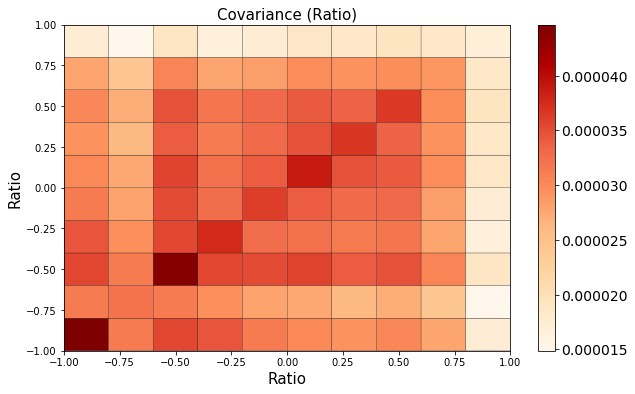

In [42]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, total_cov, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)


plt.xlabel("Ratio", fontsize=15)
plt.ylabel("Ratio", fontsize=15)


plt.title('Covariance (Ratio)', fontsize=15)

if isCombined == True:
    plt.savefig("Ratio_Full_Truth_Cov_angleDiff_"+ending+".svg", bbox_inches='tight')

plt.show()

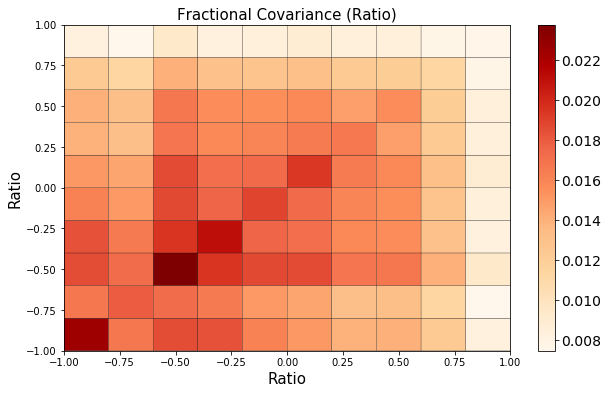

In [43]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, ratio_frac_cov, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)


plt.xlabel("Ratio", fontsize=15)
plt.ylabel("Ratio", fontsize=15)


plt.title('Fractional Covariance (Ratio)', fontsize=15)

if isCombined == True:
    plt.savefig("Ratio_Full_Truth_FracCov_angleDiff_"+ending+".svg", bbox_inches='tight')

plt.show()

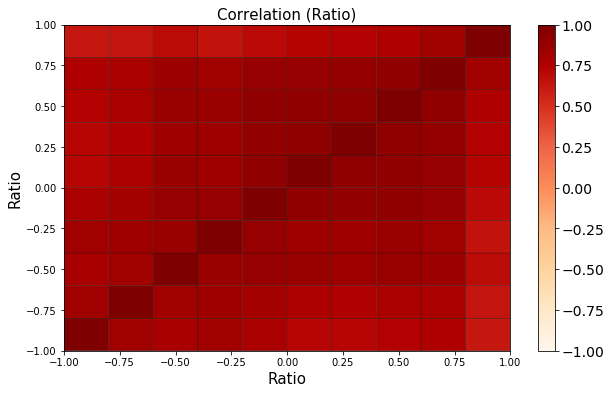

In [44]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, ratio_cor, cmap='OrRd', edgecolors='k', vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)


plt.xlabel("Ratio", fontsize=15)
plt.ylabel("Ratio", fontsize=15)


plt.title('Correlation (Ratio)', fontsize=15)

if isCombined == True:
    plt.savefig("Ratio_Full_Truth_Cor_angleDiff_"+ending+".svg", bbox_inches='tight')

plt.show()

In [45]:
ratio_exp_err = np.sqrt( np.diag((ratio_cov + ratio_cov_mc_stat + ratio_cov_mc_detsys)))

print("ratio_cov ", np.diag(ratio_cov))
print("")
print("ratio_cov_mc_stat ", np.nan_to_num(np.diag(ratio_cov_mc_stat)))
print("")
print("np.diag ", np.nan_to_num(np.diag((ratio_cov + ratio_cov_mc_stat + ratio_cov_mc_detsys))))
print("")
print("ratio_exp_err ", np.nan_to_num(ratio_exp_err))

ratio_cov  [3.93433054e-05 2.81141477e-05 4.02627633e-05 3.48127879e-05
 3.36270586e-05 3.64348557e-05 3.45339243e-05 3.45136228e-05
 2.71567337e-05 1.54982195e-05]

ratio_cov_mc_stat  [4.17292254e-06 2.97908199e-06 2.69253193e-06 1.91409876e-06
 1.52469626e-06 1.23546046e-06 9.79295146e-07 7.55242140e-07
 4.98499376e-07 2.15876400e-07]

np.diag  [4.46578409e-05 3.21208309e-05 4.40224402e-05 3.77563858e-05
 3.62576521e-05 3.88229231e-05 3.67831926e-05 3.66172691e-05
 2.91238573e-05 1.69888140e-05]

ratio_exp_err  [0.00668265 0.00566752 0.00663494 0.00614462 0.00602143 0.0062308
 0.00606491 0.00605122 0.00539665 0.00412175]


[0.14089229 0.12553401 0.14741827 0.13956215 0.13234218 0.13493641
 0.12515176 0.12142175 0.10320355 0.08368451]


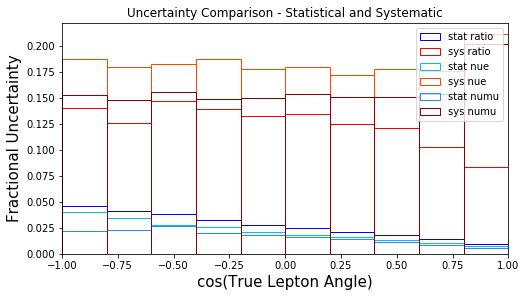

In [46]:
errors_r_fig = plt.figure(figsize=(8, 7))
errors_r_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
errors_r_ax1 = plt.subplot(ratio_gs[0])


bins = np.arange(-1.0, 1.2, 0.2)
count = [-0.9, -0.7, -0.5, -0.3, -0.1, 0.1, 0.3, 0.5, 0.7, 0.9]

#nue_cov + nue_cov_mc_stat + nue_cov_mc_detsys
#nue_cov = (cov_nue_nue_ppfx_run1 + cov_nue_nue_genie_run1 + cov_nue_nue_reint_run1 + cov_nue_nue_ppfx_run3 + cov_nue_nue_genie_run3 + cov_nue_nue_reint_run3)
#nue_cov += (cov_nue_nue_geo_run1 + cov_nue_nue_geo_run3)

#print(np.sqrt(np.diag(cov_nue_nue_ppfx_run1 + cov_nue_nue_ppfx_run3)))
#print(np.sqrt(np.diag(cov_nue_nue_genie_run1 + cov_nue_nue_genie_run3)))



nue_stat_weights = np.nan_to_num(np.sqrt(np.diag(nue_cov_mc_stat))/nue_wanted_list)
nue_sys_weights = np.nan_to_num(np.sqrt(np.nan_to_num(np.diag(nue_cov)))/nue_wanted_list)
#nue_detsys_weights = np.nan_to_num(np.sqrt(np.diag(nue_cov_mc_detsys))/nue_wanted_list)
#nue_ppfx_weights = np.nan_to_num(np.sqrt(np.diag(cov_nue_nue_ppfx_run1 + cov_nue_nue_ppfx_run3))/nue_wanted_list)
#nue_genie_weights = np.nan_to_num(np.sqrt(np.diag(cov_nue_nue_genie_run1 + cov_nue_nue_genie_run3))/nue_wanted_list)
#nue_reint_weights = np.nan_to_num(np.sqrt(np.diag(cov_nue_nue_reint_run1 + cov_nue_nue_reint_run3))/nue_wanted_list)
#nue_geo_weights = np.nan_to_num(np.sqrt(np.diag(cov_nue_nue_geo_run1 + cov_nue_nue_geo_run3))/nue_wanted_list)

numu_stat_weights = np.nan_to_num(np.sqrt(np.nan_to_num(np.diag(numu_cov_mc_stat)))/numu_wanted_list)
numu_sys_weights = np.nan_to_num(np.sqrt(np.nan_to_num(np.diag(numu_cov)))/numu_wanted_list)
ratio_stat_weights = np.nan_to_num(np.sqrt(np.nan_to_num(np.diag(ratio_cov_mc_stat)))/rbin_ratios)
ratio_sys_weights = np.nan_to_num(np.sqrt(np.nan_to_num(np.diag(ratio_cov)))/rbin_ratios)

print(ratio_sys_weights)

sel_stat = errors_r_ax1.hist(count, bins, edgecolor='blue', facecolor='None', weights=ratio_stat_weights, label='stat ratio')
sel_sys = errors_r_ax1.hist(count, bins, edgecolor='red', facecolor='None', weights=ratio_sys_weights, label='sys ratio')
sel_stat = errors_r_ax1.hist(count, bins, edgecolor='deepskyblue', facecolor='None', weights=nue_stat_weights, label='stat nue')
sel_sys = errors_r_ax1.hist(count, bins, edgecolor='orangered', facecolor='None', weights=nue_sys_weights, label='sys nue')
#sel_detsys = errors_r_ax1.hist(count, bins, edgecolor='green', facecolor='None', weights=nue_detsys_weights, label='detsys nue')
#sel_ppfx = errors_r_ax1.hist(count, bins, edgecolor='red', facecolor='None', weights=nue_ppfx_weights, label='ppfx nue')
#sel_genie = errors_r_ax1.hist(count, bins, edgecolor='yellow', facecolor='None', weights=nue_genie_weights, label='genie nue')
#sel_reint = errors_r_ax1.hist(count, bins, edgecolor='orange', facecolor='None', weights=nue_reint_weights, label='reint nue')
#sel_geo = errors_r_ax1.hist(count, bins, edgecolor='pink', facecolor='None', weights=nue_geo_weights, label='geo nue')


sel_stat = errors_r_ax1.hist(count, bins, edgecolor='dodgerblue', facecolor='None', weights=numu_stat_weights, label='stat numu')
sel_sys = errors_r_ax1.hist(count, bins, edgecolor='darkred', facecolor='None', weights=numu_sys_weights, label='sys numu')
errors_r_ax1.set_ylabel('Fractional Uncertainty', fontsize=15)
errors_r_ax1.set_xlabel('cos(True Lepton Angle)', fontsize=15)
errors_r_ax1.set_title("Uncertainty Comparison - Statistical and Systematic")
errors_r_ax1.set_xlim([-1, 1])
#errors_r_ax1.set_ylim([0, 0.2])
leg = errors_r_ax1.legend()
#errors_r_ax1.set_yscale('log')

In [47]:
if isRun3 == False and isCombined == False:
    errors_r_fig.savefig("batch_stat_vs_sys_errors_fig_full_500_catsel_ratio_nopions_angleDiff_fraclog_consistent_"+ending+".pdf")
elif isRun3 == True and isCombined == False:
    errors_r_fig.savefig("batch_stat_vs_sys_errors_fig_full_500_catsel_ratio_nopions_angleDiff_fraclog_consistent_run3_"+ending+".pdf")
elif isCombined == True:
    errors_r_fig.savefig("batch_stat_vs_sys_errors_fig_full_500_catsel_ratio_nopions_angleDiff_fraclog_consistent_comb_"+ending+".svg",bbox_inches='tight')    
       

In [48]:
ratio_bins = np.arange(-1, 1.2, 0.2)
ratio_bincenters = np.arange(-0.9, 1.1, 0.2)
ratio_bin_edges = np.arange(-1, 1.2, 0.2)
ratio_bin_size = [(ratio_bin_edges[i + 1] - ratio_bin_edges[i]) / 2
            for i in range(len(ratio_bin_edges) - 1)]
ratio_n_tot = rbin_ratios

print(ratio_n_tot)
print("")
print("error")
print(np.nan_to_num(ratio_exp_err))
print("")
ratio_frac_err = np.nan_to_num(ratio_exp_err / ratio_n_tot)
print(ratio_frac_err)
lower_err = np.nan_to_num(ratio_n_tot-ratio_exp_err)

#nue_ax1.bar(nue_bincenters, nue_exp_err*2,width=[n*2 for n in nue_bin_size],facecolor='tab:blue',alpha=0.2,bottom=(nue_n_tot-nue_exp_err))
#numu_ax1.bar(numu_bincenters, numu_exp_err*2,width=[n*2 for n in numu_bin_size],facecolor='tab:blue',alpha=0.2,bottom=(numu_n_tot-numu_exp_err))
ratio_ax1.bar(ratio_bincenters, ratio_exp_err*2,width=[n*2 for n in ratio_bin_size],facecolor='tab:green',alpha=0.2,bottom=(lower_err))
#ratio_ax1.set_ylim([0, 2.1])
ratio_ax1.set_xlim([-1, 1])

[0.04451928693897323, 0.04223777704501422, 0.043042796384500474, 0.04227676480603967, 0.043817353615538256, 0.044733139379621145, 0.04695545166059374, 0.04838366863060055, 0.05049450398517581, 0.04704309064053734]

error
[0.00668265 0.00566752 0.00663494 0.00614462 0.00602143 0.0062308
 0.00606491 0.00605122 0.00539665 0.00412175]

[0.1501069  0.1341814  0.15414753 0.14534278 0.13742119 0.13928833
 0.12916317 0.12506742 0.10687604 0.08761646]


(-1, 1)

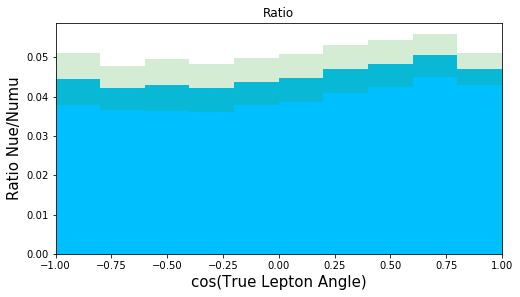

In [49]:
ratio_fig


In [50]:
if isRun3 == False and isCombined == False:
    ratio_fig.savefig("batch_ratio_fig_full_500_catsel_nopions_angleDiff_recoCut_"+ending+".pdf")
elif isRun3 == True and isCombined == False:
    ratio_fig.savefig("batch_ratio_fig_full_500_catsel_nopions_angleDiff_recoCut_run3_"+ending+".pdf") 
elif isCombined == True:
    ratio_fig.savefig("batch_ratio_fig_full_500_catsel_nopions_angleDiff_recoCut_comb_"+ending+".svg",bbox_inches='tight') 

In [51]:
nue_bin_edges = np.arange(-1, 1.2, 0.2)
nue_bincenters = 0.5 * (nue_bin_edges[1:] + nue_bin_edges[:-1])
nue_bin_size = [(nue_bin_edges[i + 1] - nue_bin_edges[i]) / 2
            for i in range(len(nue_bin_edges) - 1)]

nue_frac_err = np.nan_to_num(nue_exp_err / n_nue_tot)
print(nue_frac_err)
lower_err = np.nan_to_num(n_nue_tot-nue_exp_err)

nue_ax1.bar(nue_bincenters, nue_exp_err*2,width=[n*2 for n in nue_bin_size],facecolor='tab:green',alpha=0.2,bottom=(n_nue_tot-nue_exp_err))

[0.19188994 0.18299076 0.18450351 0.18942828 0.17952516 0.18078484
 0.17327113 0.17842548 0.17639019 0.21177104]


<BarContainer object of 10 artists>

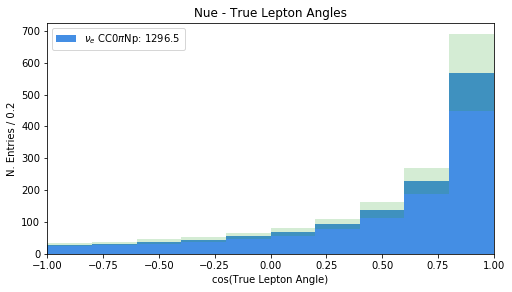

In [52]:
nue_fig

In [53]:
if isRun3 == False and isCombined == False:
    nue_fig.savefig("batch_nue_fig_full_500_catsel_nopions_angleDiff_recoCut_"+ending+".pdf")
elif isRun3 == True and isCombined == False:
    nue_fig.savefig("batch_nue_fig_full_500_catsel_nopions_angleDiff_recoCut_run3_"+ending+".pdf")
elif isCombined == True:
    nue_fig.savefig("batch_nue_fig_full_500_catsel_nopions_angleDiff_recoCut_comb_"+ending+".svg",bbox_inches='tight') 

In [54]:
numu_bin_edges = np.arange(-1, 1.2, 0.2)
numu_bincenters = 0.5 * (numu_bin_edges[1:] + numu_bin_edges[:-1])
numu_bin_size = [(numu_bin_edges[i + 1] - numu_bin_edges[i]) / 2
            for i in range(len(numu_bin_edges) - 1)]

numu_frac_err = np.nan_to_num(numu_exp_err / n_numu_tot)
print(numu_frac_err)
lower_err = np.nan_to_num(n_numu_tot-numu_exp_err)

numu_ax1.bar(numu_bincenters, numu_exp_err*2,width=[n*2 for n in numu_bin_size],facecolor='tab:green',alpha=0.2,bottom=(lower_err))

[0.1582061  0.15320465 0.16100375 0.15387753 0.15481978 0.15793466
 0.1549019  0.15511015 0.1570544  0.20420948]


<BarContainer object of 10 artists>

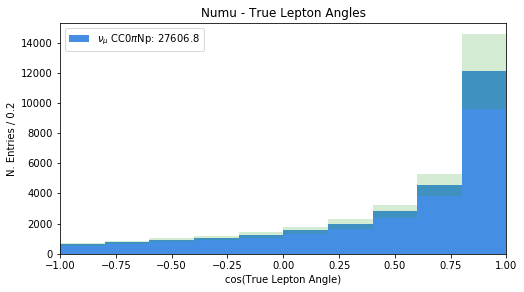

In [55]:
numu_fig

In [56]:
if isRun3 == False and isCombined == False:
    numu_fig.savefig("batch_numu_fig_full_500_catsel_nopions_angleDiff_recoCut_"+ending+".pdf")
elif isRun3 == True and isCombined == False:
    numu_fig.savefig("batch_numu_fig_full_500_catsel_nopions_angleDiff_recoCut_run3_"+ending+".pdf") 
elif isCombined == True:
    numu_fig.savefig("batch_numu_fig_full_500_catsel_nopions_angleDiff_recoCut_comb_"+ending+".svg",bbox_inches='tight' ) 

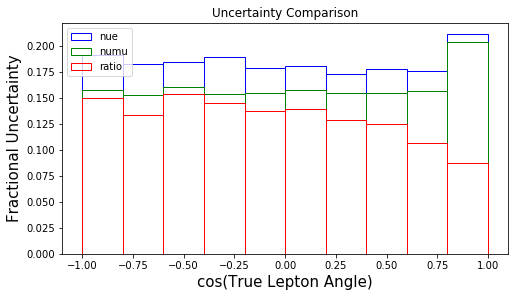

In [57]:
errors_fig = plt.figure(figsize=(8, 7))
errors_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
errors_ax1 = plt.subplot(ratio_gs[0])


bins = np.arange(-1, 1.2, 0.2)
count = [-0.9, -0.7, -0.5, -0.3, -0.1, 0.1, 0.3, 0.5, 0.7, 0.9]


sel_nue = errors_ax1.hist(count, bins, edgecolor='blue', facecolor='None', weights=nue_frac_err, label='nue')
sel_numu = errors_ax1.hist(count, bins, edgecolor='green', facecolor='None', weights=numu_frac_err, label='numu')
sel_ratio = errors_ax1.hist(count, bins, edgecolor='red', facecolor='None', weights=ratio_frac_err, label='ratio')
errors_ax1.set_ylabel('Fractional Uncertainty', fontsize=15)
errors_ax1.set_xlabel('cos(True Lepton Angle)', fontsize=15)
errors_ax1.set_title("Uncertainty Comparison")
leg = errors_ax1.legend()
#errors_ax1.set_xlim([0, 5])
#errors_ax1.set_ylim([0, 1])

In [58]:
if isRun3 == False and isCombined == False:
    errors_fig.savefig("batch_errors_fig_full_500_catsel_nopions_angleDiff_recoCut_"+ending+".pdf")
elif isRun3 == True and isCombined == False:
    errors_fig.savefig("batch_errors_fig_full_500_catsel_nopions_angleDiff_recoCut_run3_"+ending+".pdf")
elif isCombined == True:
    errors_fig.savefig("batch_errors_fig_full_500_catsel_nopions_angleDiff_recoCut_comb_"+ending+".svg",bbox_inches='tight')  

## For Blockwise Unfolding

In [18]:
print("n_nue_tot", n_nue_tot)

n_nue_tot [  9.86174388  11.93508746  14.15381678  16.41497177  20.3938091
  26.36048745  34.40545213  48.72574113  80.02352253 172.446327  ]


In [19]:
print("n_numu_tot", n_numu_tot)

n_numu_tot [ 245.76979377  269.38303455  287.45565821  353.28773606  404.93434957
  499.97645032  624.47108941  849.1695983  1387.96673319 3484.49331031]


In [20]:
nue_numu_tot = np.concatenate((n_nue_tot, n_numu_tot), axis=0)

print(nue_numu_tot)
print(len(nue_numu_tot))

[   9.86174388   11.93508746   14.15381678   16.41497177   20.3938091
   26.36048745   34.40545213   48.72574113   80.02352253  172.446327
  245.76979377  269.38303455  287.45565821  353.28773606  404.93434957
  499.97645032  624.47108941  849.1695983  1387.96673319 3484.49331031]
20


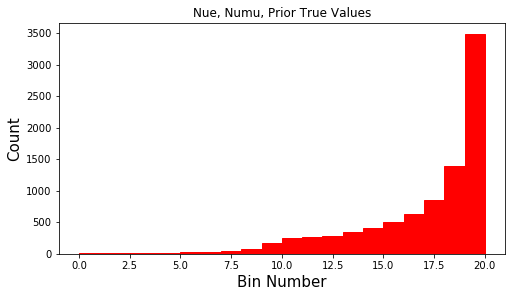

In [21]:
nue_numu_fig = plt.figure(figsize=(8, 7))
nue_numu_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_numu_ax1 = plt.subplot(nue_numu_gs[0])


#bins = np.arange(0, 10.5, 0.5)
#count = np.linspace(0.1, 9.6, 20)
bins = np.arange(0, 21, 1)
count = np.arange(0.0, 20.0, 1)


sel_ratio = nue_numu_ax1.hist(count, bins, edgecolor='red', facecolor='red', weights=nue_numu_tot)
nue_numu_ax1.set_ylabel('Count', fontsize=15)
nue_numu_ax1.set_xlabel('Bin Number', fontsize=15)
nue_numu_ax1.set_title("Nue, Numu, Prior True Values")
#leg = nue_numu_ax1.legend()
#nue_numu_ax1.set_ylim([0, 1])

if isCombined == True:
    nue_numu_fig.savefig("prior_true_input_angleDiff_comb_"+ending+".svg", bbox_inches='tight')

In [22]:
if isRun3 == False and isCombined == False:
    np.savetxt("nue_full_500_catsel_nopions_angleDiff_usingSelection_prior_true_signal_blockwise_recoCut_"+ending+".csv", 
               nue_numu_tot,
               delimiter =", ", 
               fmt ='% s')
elif isRun3 == True and isCombined == False:
    np.savetxt("nue_full_500_catsel_nopions_angleDiff_usingSelection_prior_true_signal_blockwise_recoCut_run3_"+ending+".csv", 
               nue_numu_tot,
               delimiter =", ", 
               fmt ='% s')
elif isCombined == True:
    np.savetxt("nue_full_500_catsel_nopions_angleDiff_usingSelection_prior_true_signal_blockwise_recoCut_comb_"+ending+".csv", 
               nue_numu_tot,
               delimiter =", ", 
               fmt ='% s')    
